# Housing Price Prediction Project

# Problem Statement

Houses are one of the necessary need of each and every person around the globe and therefore housing and real estate market is one of the markets which is one of the major contributors in the world’s economy. It is a very large market and there are various companies working in the domain. Data science comes as a very important tool to solve problems in the domain to help the companies increase their overall revenue, profits, improving their marketing strategies and focusing on changing trends in house sales and purchases. Predictive modelling, Market mix modelling, recommendation systems are some of the machine learning techniques used for achieving the business goals for housing companies. Our problem is related to one such housing company.
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia. The data is provided in the CSV file below.
The company is looking at prospective properties to buy houses to enter the market. You are required to build a model using Machine Learning in order to predict the actual value of the prospective properties and decide whether to invest in them or not. For this company wants to know:

1. Which variables are important to predict the price of variable?
2. How do these variables describe the price of the house?

# Business Goal

To model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for the management to understand the pricing dynamics of a new market.

# Loading the training dataset

In [1]:
# Importing the libraries which are required
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Seting options to display all the rows and columns for review
#pd.set_option('display.max_columns', 81)
#pd.set_option('display.max_rows', 1168)

In [3]:
# Loading Data Set
traindf=pd.read_csv("housing_train.csv")
traindf

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     127         120       RL          NaN     4928   Pave   NaN      IR1   
1     889          20       RL         95.0    15865   Pave   NaN      IR1   
2     793          60       RL         92.0     9920   Pave   NaN      IR1   
3     110          20       RL        105.0    11751   Pave   NaN      IR1   
4     422          20       RL          NaN    16635   Pave   NaN      IR1   
...   ...         ...      ...          ...      ...    ...   ...      ...   
1163  289          20       RL          NaN     9819   Pave   NaN      IR1   
1164  554          20       RL         67.0     8777   Pave   NaN      Reg   
1165  196         160       RL         24.0     2280   Pave   NaN      Reg   
1166   31          70  C (all)         50.0     8500   Pave  Pave      Reg   
1167  617          60       RL          NaN     7861   Pave   NaN      IR1   

     LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
2            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
3            Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
4            Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
...          ...       ...  ...      ...    ...    ...         ...     ...   
1163         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1164         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1165         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   
1166         Lvl    AllPub  ...        0    NaN  MnPrv         NaN       0   
1167         Lvl    AllPub  ...        0    NaN    NaN         NaN       0   

     MoSold YrSold  SaleType  SaleCondition  SalePrice  
0         2   2007        WD         Normal     128000  
1        10   2007        WD         Normal     268000  
2         6   2007        WD         Normal     269790  
3         1   2010       COD         Normal     190000  
4         6   2009        WD         Normal     215000  
...     ...    ...       ...            ...        ...  
1163      2   2010        WD         Normal     122000  
1164      5   2009        WD         Normal     108000  
1165      7   2009        WD         Normal     148500  
1166      7   2008        WD         Normal      40000  
1167      6   2006        WD         Normal     183200  

[1168 rows x 81 columns]

In [6]:
traindf.shape

(1168, 81)

**Train Data set is having 1168 rows and 81 columns icluding the target column** 

In [7]:
traindf.isnull().sum().sort_values(ascending=False)

PoolQC         1161
MiscFeature    1124
Alley          1091
Fence           931
FireplaceQu     551
               ... 
ExterQual         0
Exterior2nd       0
Exterior1st       0
RoofMatl          0
SalePrice         0
Length: 81, dtype: int64

**Observations**
As we can see that there are multiple columns are having null values. It has to taken care for the either treating it and dropping the column
1. PoolQC           1161
2. MiscFeature      1124
3. Alley            1091
4. Fence             931
5. FireplaceQu       551
6. LotFrontage       214
7. GarageYrBlt        64
8. GarageFinish       64
9. GarageType         64
10. GarageQual         64
11. GarageCond         64
12. BsmtExposure       31
13. BsmtFinType2       31
14. BsmtQual           30
15. BsmtCond           30
16. BsmtFinType1       30
17. MasVnrType          7
18. MasVnrArea          7

**For PoolQC, MiscFeature, Alley, Fence, FireplaceQu the Null values are either equal to 50% or more than that so we can think of droping that columns**

**For rest of the columns we can fill that columns according type of the columns by mode or mean**

In [8]:
traindf.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

**Since the columns and the content in the column is having correct data types so need not to be checked for the void spaces and others**

# Dropping the Columns as per the observation in the earlier step



In [9]:
# dropping columns
traindf=traindf.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
traindf

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            120       RL          NaN     4928   Pave      IR1         Lvl   
1             20       RL         95.0    15865   Pave      IR1         Lvl   
2             60       RL         92.0     9920   Pave      IR1         Lvl   
3             20       RL        105.0    11751   Pave      IR1         Lvl   
4             20       RL          NaN    16635   Pave      IR1         Lvl   
...          ...      ...          ...      ...    ...      ...         ...   
1163          20       RL          NaN     9819   Pave      IR1         Lvl   
1164          20       RL         67.0     8777   Pave      Reg         Lvl   
1165         160       RL         24.0     2280   Pave      Reg         Lvl   
1166          70  C (all)         50.0     8500   Pave      Reg         Lvl   
1167          60       RL          NaN     7861   Pave      IR1         Lvl   

     Utilities LotConfig LandSlope  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0       AllPub    Inside       Gtl  ...             0         0           0   
1       AllPub    Inside       Mod  ...             0         0         224   
2       AllPub   CulDSac       Gtl  ...             0         0           0   
3       AllPub    Inside       Gtl  ...             0         0           0   
4       AllPub       FR2       Gtl  ...             0         0           0   
...        ...       ...       ...  ...           ...       ...         ...   
1163    AllPub    Inside       Gtl  ...             0         0           0   
1164    AllPub    Inside       Gtl  ...             0         0           0   
1165    AllPub       FR2       Gtl  ...             0         0           0   
1166    AllPub    Inside       Gtl  ...           172         0           0   
1167    AllPub    Inside       Gtl  ...             0         0           0   

     PoolArea MiscVal  MoSold  YrSold  SaleType  SaleCondition SalePrice  
0           0       0       2    2007        WD         Normal    128000  
1           0       0      10    2007        WD         Normal    268000  
2           0       0       6    2007        WD         Normal    269790  
3           0       0       1    2010       COD         Normal    190000  
4           0       0       6    2009        WD         Normal    215000  
...       ...     ...     ...     ...       ...            ...       ...  
1163        0       0       2    2010        WD         Normal    122000  
1164        0       0       5    2009        WD         Normal    108000  
1165        0       0       7    2009        WD         Normal    148500  
1166        0       0       7    2008        WD         Normal     40000  
1167        0       0       6    2006        WD         Normal    183200  

[1168 rows x 75 columns]

**Filling thenull values with fill na method**

In [10]:
# Filling missing values 
for i in traindf.columns:
    if traindf[i].dtypes=='object':
        traindf[i]=traindf[i].fillna(traindf[i].mode()[0])
    else:
        traindf[i]=traindf[i].fillna(traindf[i].mean())

In [11]:
traindf.isnull().sum().sum()

0

In [12]:
# For Numeric columns
traindf.describe()

MSSubClass  LotFrontage        LotArea  OverallQual  OverallCond  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     56.767979    70.988470   10484.749144     6.104452     5.595890   
std      41.940650    22.437056    8957.442311     1.390153     1.124343   
min      20.000000    21.000000    1300.000000     1.000000     1.000000   
25%      20.000000    60.000000    7621.500000     5.000000     5.000000   
50%      50.000000    70.988470    9522.500000     6.000000     5.000000   
75%      70.000000    79.250000   11515.500000     7.000000     6.000000   
max     190.000000   313.000000  164660.000000    10.000000     9.000000   

         YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1   BsmtFinSF2  ...  \
count  1168.000000   1168.000000  1168.000000  1168.000000  1168.000000  ...   
mean   1970.930651   1984.758562   102.310078   444.726027    46.647260  ...   
std      30.145255     20.785185   182.047152   462.664785   163.520016  ...   
min    1875.000000   1950.000000     0.000000     0.000000     0.000000  ...   
25%    1954.000000   1966.000000     0.000000     0.000000     0.000000  ...   
50%    1972.000000   1993.000000     0.000000   385.500000     0.000000  ...   
75%    2000.000000   2004.000000   160.000000   714.500000     0.000000  ...   
max    2010.000000   2010.000000  1600.000000  5644.000000  1474.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1168.000000  1168.000000    1168.000000  1168.000000  1168.000000   
mean     96.206336    46.559932      23.015411     3.639555    15.051370   
std     126.158988    66.381023      63.191089    29.088867    55.080816   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    24.000000       0.000000     0.000000     0.000000   
75%     171.000000    70.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1168.000000   1168.000000  1168.000000  1168.000000    1168.000000  
mean      3.448630     47.315068     6.344178  2007.804795  181477.005993  
std      44.896939    543.264432     2.686352     1.329738   79105.586863  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  130375.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163995.000000  
75%       0.000000      0.000000     8.000000  2009.000000  215000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 37 columns]

**observations**
1. MSSubClass, LotArea, OverallQual, OverallCond, BsmtFinSF1, OpenPorchSF, MoSold are positively skewed as mean is more than median
2. LotFrantage is normally distributed
3. Rest is having some complex distribution

In [13]:
# Describe function for Categorical column
traindf.describe(include=['O'])

MSZoning Street LotShape LandContour Utilities LotConfig LandSlope  \
count      1168   1168     1168        1168      1168      1168      1168   
unique        5      2        4           4         1         5         3   
top          RL   Pave      Reg         Lvl    AllPub    Inside       Gtl   
freq        928   1164      740        1046      1168       842      1105   

       Neighborhood Condition1 Condition2  ... Electrical KitchenQual  \
count          1168       1168       1168  ...       1168        1168   
unique           25          9          8  ...          5           4   
top           NAmes       Norm       Norm  ...      SBrkr          TA   
freq            182       1005       1154  ...       1070         578   

       Functional GarageType GarageFinish GarageQual GarageCond PavedDrive  \
count        1168       1168         1168       1168       1168       1168   
unique          7          6            3          5          5          3   
top           Typ     Attchd          Unf         TA         TA          Y   
freq         1085        755          551       1114       1125       1071   

       SaleType SaleCondition  
count      1168          1168  
unique        9             6  
top          WD        Normal  
freq        999           945  

[4 rows x 38 columns]

**Observations**
As we can see that the null values are filled, the data is giving entire values as no.of rows. And the occurance of max frequency value is also given.


Countplot for  MSZoning
RL         928
RM         163
FV          52
RH          16
C (all)      9
Name: MSZoning, dtype: int64


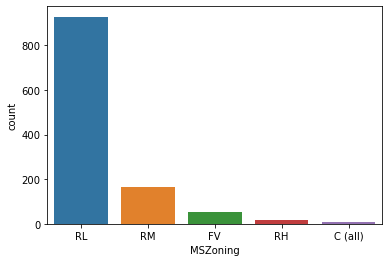

Countplot for  Street
Pave    1164
Grvl       4
Name: Street, dtype: int64


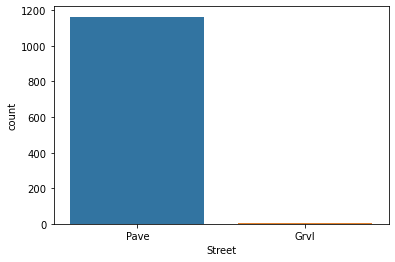

Countplot for  LotShape
Reg    740
IR1    390
IR2     32
IR3      6
Name: LotShape, dtype: int64


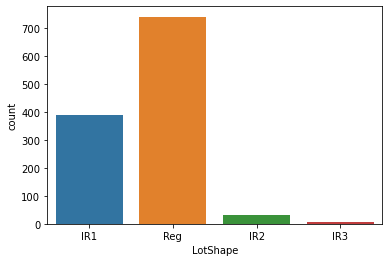

Countplot for  LandContour
Lvl    1046
Bnk      50
HLS      42
Low      30
Name: LandContour, dtype: int64


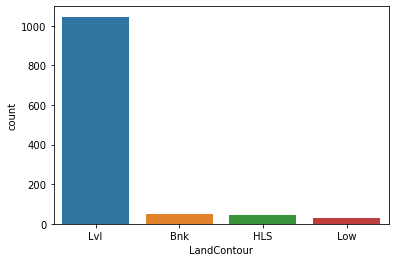

Countplot for  Utilities
AllPub    1168
Name: Utilities, dtype: int64


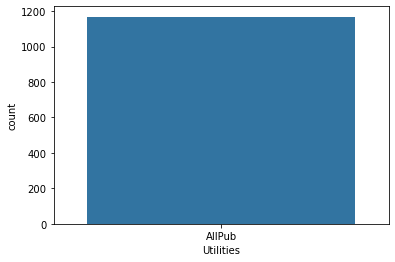

Countplot for  LotConfig
Inside     842
Corner     222
CulDSac     69
FR2         33
FR3          2
Name: LotConfig, dtype: int64


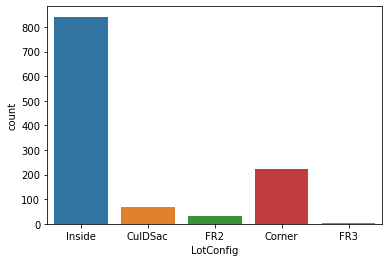

Countplot for  LandSlope
Gtl    1105
Mod      51
Sev      12
Name: LandSlope, dtype: int64


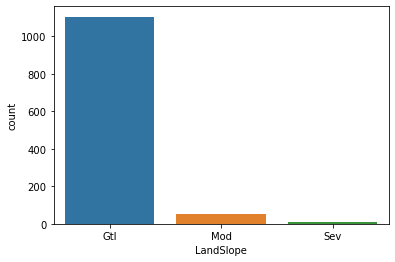

Countplot for  Neighborhood
NAmes      182
CollgCr    118
OldTown     86
Edwards     83
Somerst     68
Gilbert     64
NridgHt     61
Sawyer      60
NWAmes      59
SawyerW     51
BrkSide     50
Crawfor     45
NoRidge     35
Mitchel     34
IDOTRR      30
Timber      24
ClearCr     24
SWISU       21
StoneBr     19
Blmngtn     15
BrDale      11
MeadowV      9
Veenker      9
NPkVill      8
Blueste      2
Name: Neighborhood, dtype: int64


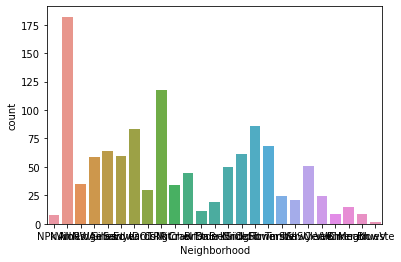

Countplot for  Condition1
Norm      1005
Feedr       67
Artery      38
RRAn        20
PosN        17
RRAe         9
PosA         6
RRNn         4
RRNe         2
Name: Condition1, dtype: int64


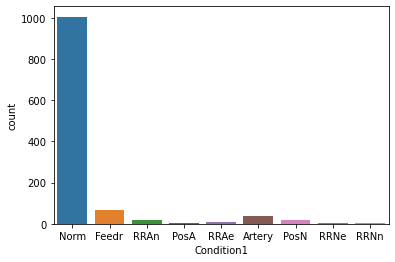

Countplot for  Condition2
Norm      1154
Feedr        6
PosN         2
Artery       2
RRAe         1
RRNn         1
PosA         1
RRAn         1
Name: Condition2, dtype: int64


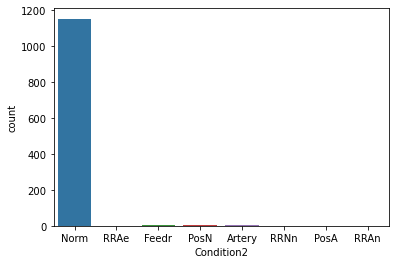

Countplot for  BldgType
1Fam      981
TwnhsE     90
Duplex     41
Twnhs      29
2fmCon     27
Name: BldgType, dtype: int64


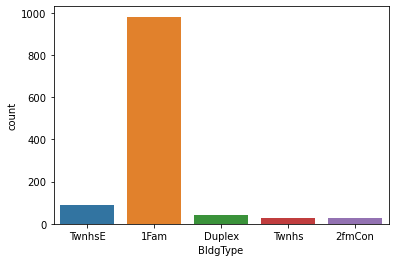

Countplot for  HouseStyle
1Story    578
2Story    361
1.5Fin    121
SLvl       47
SFoyer     32
1.5Unf     12
2.5Unf     10
2.5Fin      7
Name: HouseStyle, dtype: int64


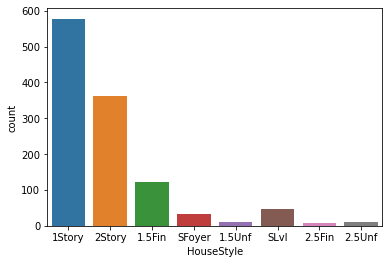

Countplot for  RoofStyle
Gable      915
Hip        225
Flat        12
Gambrel      9
Mansard      5
Shed         2
Name: RoofStyle, dtype: int64


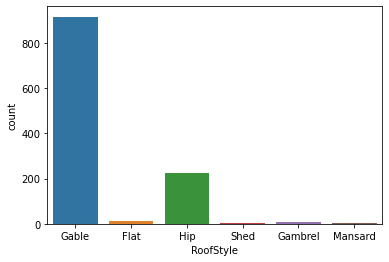

Countplot for  RoofMatl
CompShg    1144
Tar&Grv      10
WdShngl       6
WdShake       4
Roll          1
ClyTile       1
Metal         1
Membran       1
Name: RoofMatl, dtype: int64


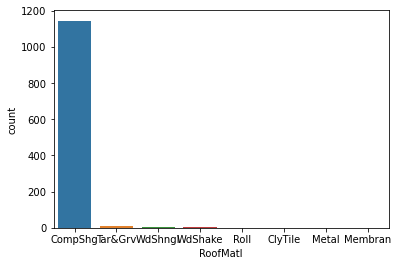

Countplot for  Exterior1st
VinylSd    396
HdBoard    179
MetalSd    178
Wd Sdng    174
Plywood     93
CemntBd     42
BrkFace     41
Stucco      22
WdShing     19
AsbShng     19
Stone        2
AsphShn      1
ImStucc      1
BrkComm      1
Name: Exterior1st, dtype: int64


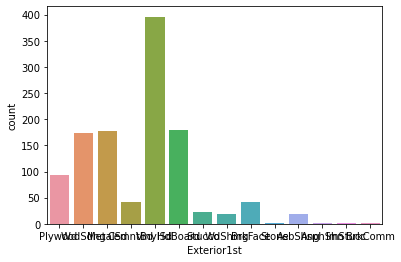

Countplot for  Exterior2nd
VinylSd    387
MetalSd    173
HdBoard    170
Wd Sdng    165
Plywood    118
CmentBd     42
Wd Shng     31
Stucco      23
BrkFace     20
AsbShng     18
ImStucc      8
Brk Cmn      5
Stone        4
AsphShn      3
Other        1
Name: Exterior2nd, dtype: int64


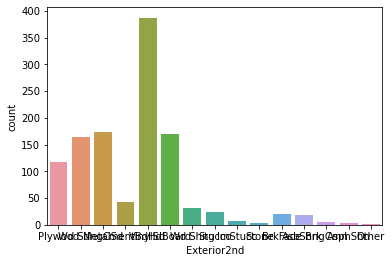

Countplot for  MasVnrType
None       703
BrkFace    354
Stone       98
BrkCmn      13
Name: MasVnrType, dtype: int64


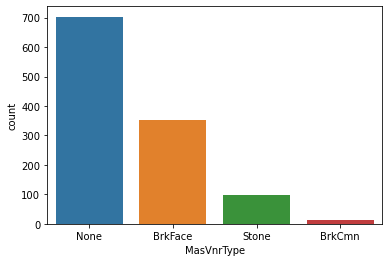

Countplot for  ExterQual
TA    717
Gd    397
Ex     43
Fa     11
Name: ExterQual, dtype: int64


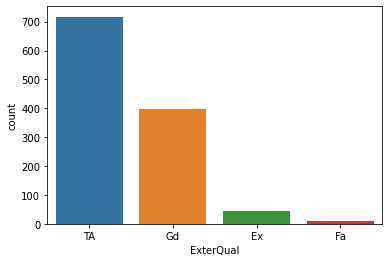

Countplot for  ExterCond
TA    1022
Gd     117
Fa      26
Ex       2
Po       1
Name: ExterCond, dtype: int64


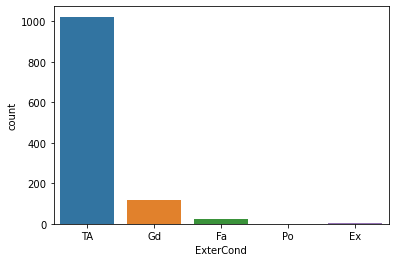

Countplot for  Foundation
CBlock    516
PConc     513
BrkTil    112
Slab       21
Stone       5
Wood        1
Name: Foundation, dtype: int64


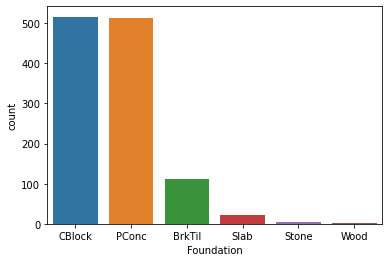

Countplot for  BsmtQual
TA    547
Gd    498
Ex     94
Fa     29
Name: BsmtQual, dtype: int64


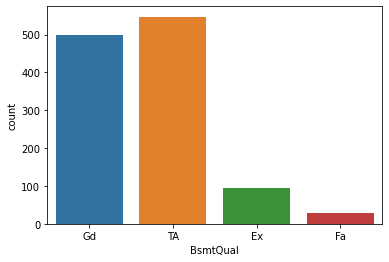

Countplot for  BsmtCond
TA    1071
Gd      56
Fa      39
Po       2
Name: BsmtCond, dtype: int64


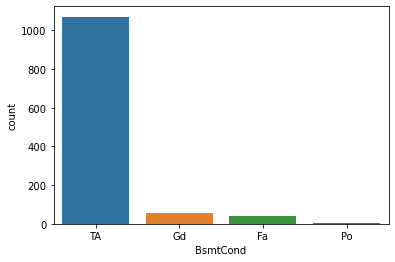

Countplot for  BsmtExposure
No    787
Av    180
Gd    108
Mn     93
Name: BsmtExposure, dtype: int64


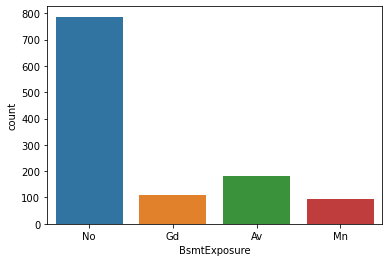

Countplot for  BsmtFinType1
Unf    375
GLQ    330
ALQ    174
BLQ    121
Rec    109
LwQ     59
Name: BsmtFinType1, dtype: int64


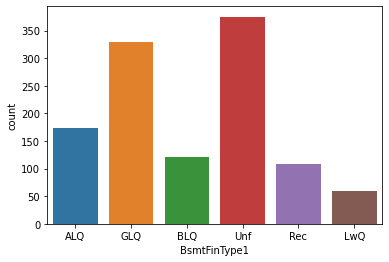

Countplot for  BsmtFinType2
Unf    1033
Rec      43
LwQ      40
BLQ      24
ALQ      16
GLQ      12
Name: BsmtFinType2, dtype: int64


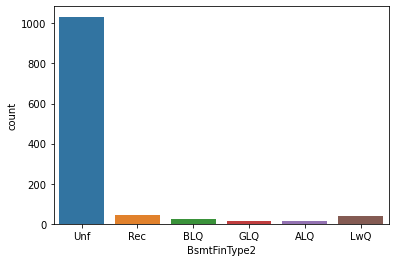

Countplot for  Heating
GasA     1143
GasW       14
Grav        5
Wall        4
Floor       1
OthW        1
Name: Heating, dtype: int64


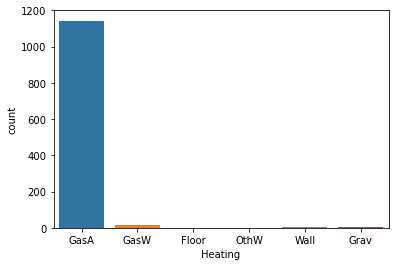

Countplot for  HeatingQC
Ex    585
TA    352
Gd    192
Fa     38
Po      1
Name: HeatingQC, dtype: int64


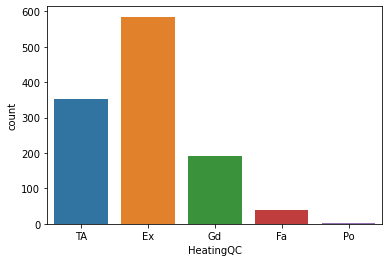

Countplot for  CentralAir
Y    1090
N      78
Name: CentralAir, dtype: int64


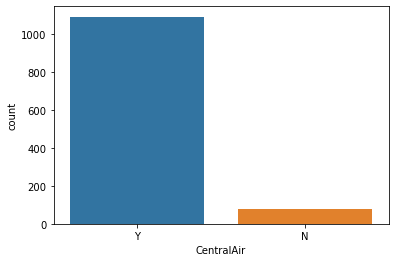

Countplot for  Electrical
SBrkr    1070
FuseA      74
FuseF      21
FuseP       2
Mix         1
Name: Electrical, dtype: int64


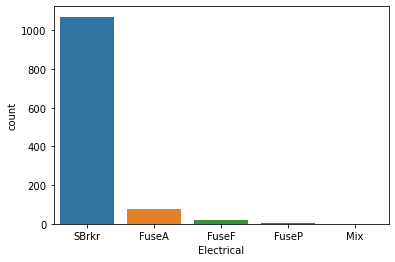

Countplot for  KitchenQual
TA    578
Gd    478
Ex     82
Fa     30
Name: KitchenQual, dtype: int64


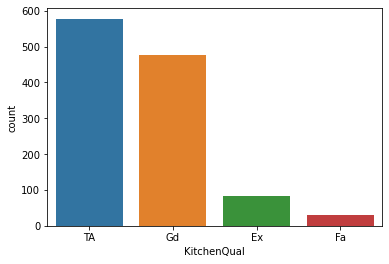

Countplot for  Functional
Typ     1085
Min2      30
Min1      25
Mod       12
Maj1      11
Maj2       4
Sev        1
Name: Functional, dtype: int64


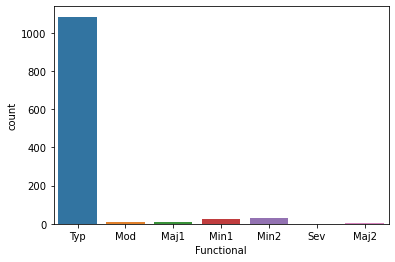

Countplot for  GarageType
Attchd     755
Detchd     314
BuiltIn     70
Basment     16
CarPort      8
2Types       5
Name: GarageType, dtype: int64


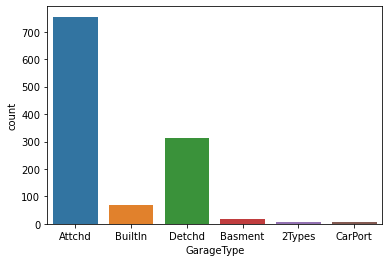

Countplot for  GarageFinish
Unf    551
RFn    339
Fin    278
Name: GarageFinish, dtype: int64


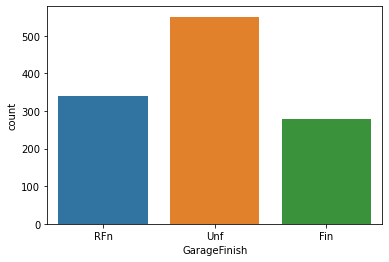

Countplot for  GarageQual
TA    1114
Fa      39
Gd      11
Ex       2
Po       2
Name: GarageQual, dtype: int64


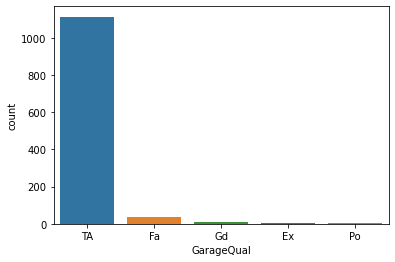

Countplot for  GarageCond
TA    1125
Fa      28
Gd       8
Po       6
Ex       1
Name: GarageCond, dtype: int64


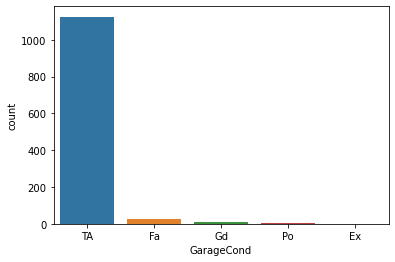

Countplot for  PavedDrive
Y    1071
N      74
P      23
Name: PavedDrive, dtype: int64


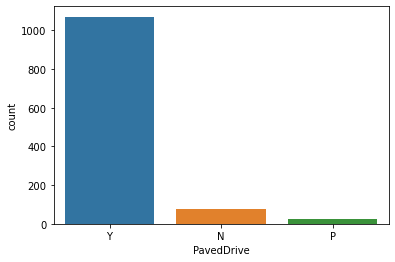

Countplot for  SaleType
WD       999
New      106
COD       38
ConLD      8
ConLI      5
ConLw      4
Oth        3
CWD        3
Con        2
Name: SaleType, dtype: int64


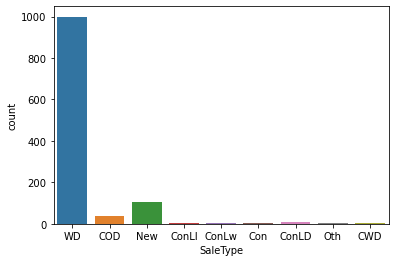

Countplot for  SaleCondition
Normal     945
Partial    108
Abnorml     81
Family      18
Alloca      12
AdjLand      4
Name: SaleCondition, dtype: int64


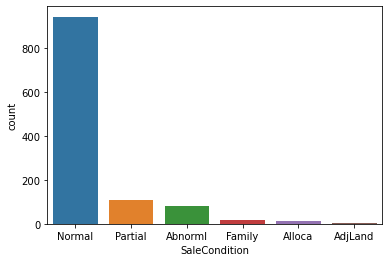

In [14]:
# Ploting count plot for categorical data
for i in traindf.columns:
    if traindf[i].dtypes=='object':
        print("Countplot for ", i)
        sns.countplot(x=traindf[i])
        print(traindf[i].value_counts().sort_values(ascending=False))
        plt.savefig(r"C:\Users\ADMIN\Pictures\Saved Pictures\count plot for housing\fig_{0}.png".format(i),pad_inches=1,transparent=True,bbox_inches='tight',dpi=200)
        plt.show()

Histplot for  MSSubClass


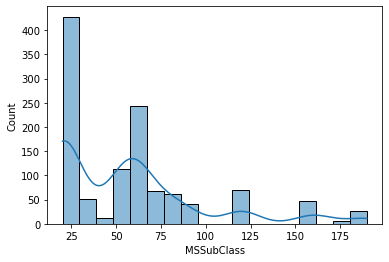

Histplot for  LotFrontage


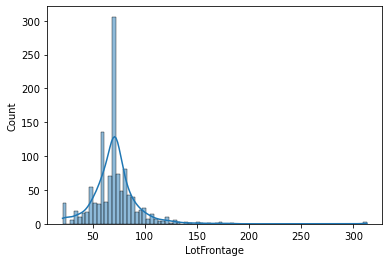

Histplot for  LotArea


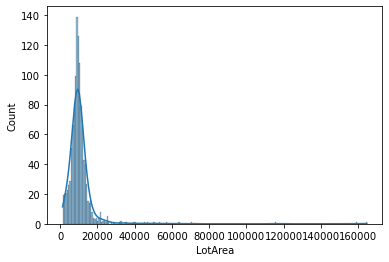

Histplot for  OverallQual


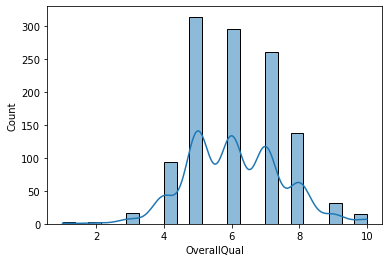

Histplot for  OverallCond


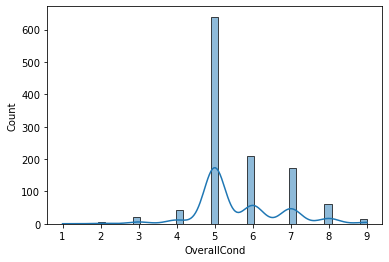

Histplot for  YearBuilt


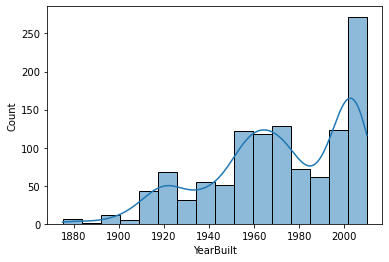

Histplot for  YearRemodAdd


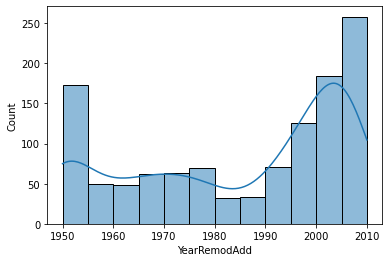

Histplot for  MasVnrArea


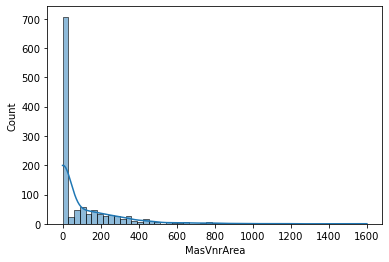

Histplot for  BsmtFinSF1


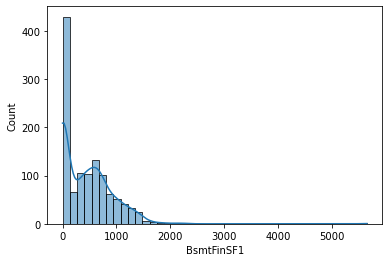

Histplot for  BsmtFinSF2


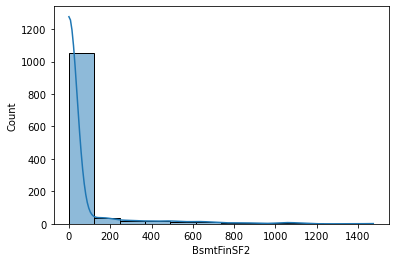

Histplot for  BsmtUnfSF


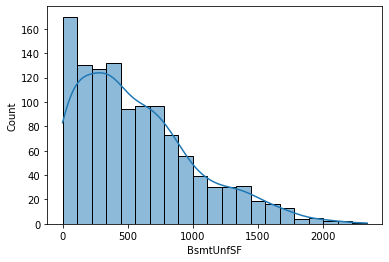

Histplot for  TotalBsmtSF


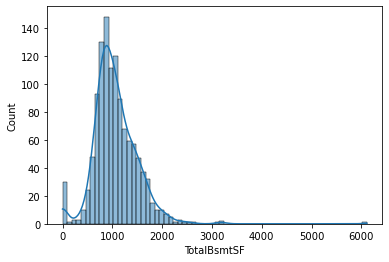

Histplot for  1stFlrSF


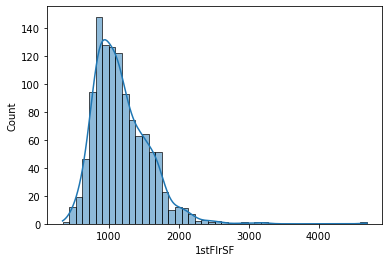

Histplot for  2ndFlrSF


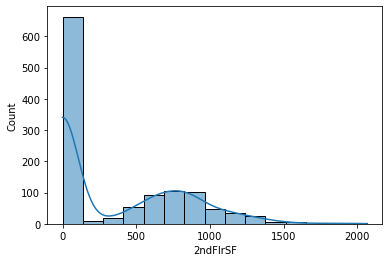

Histplot for  LowQualFinSF


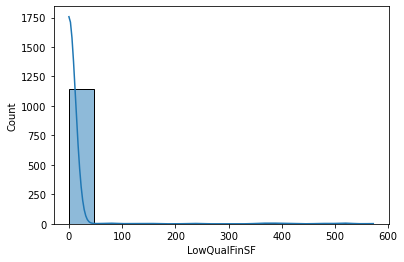

Histplot for  GrLivArea


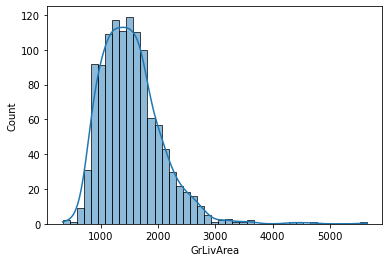

Histplot for  BsmtFullBath


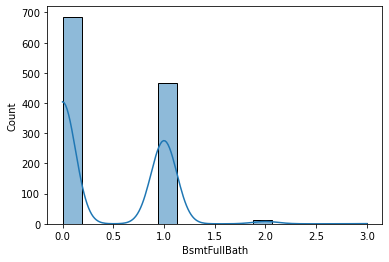

Histplot for  BsmtHalfBath


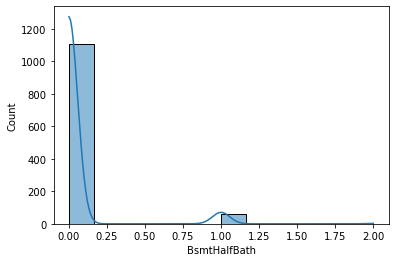

Histplot for  FullBath


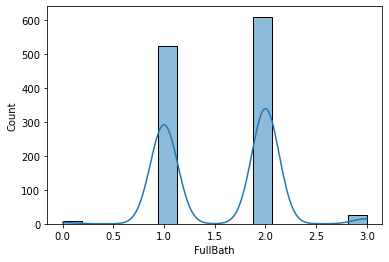

Histplot for  HalfBath


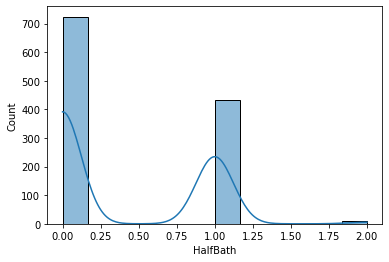

Histplot for  BedroomAbvGr


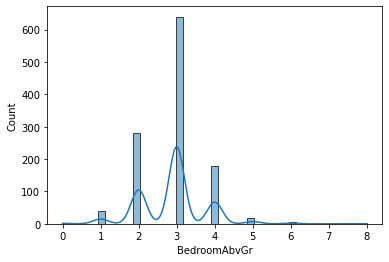

Histplot for  KitchenAbvGr


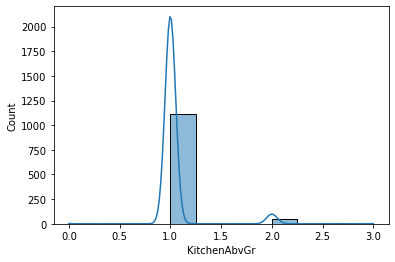

Histplot for  TotRmsAbvGrd


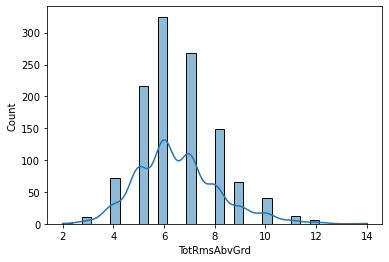

Histplot for  Fireplaces


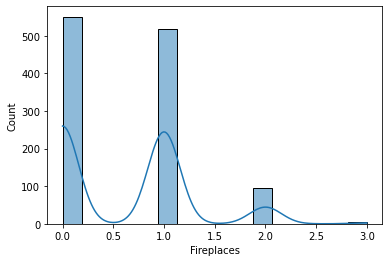

Histplot for  GarageYrBlt


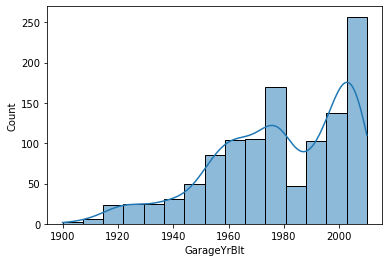

Histplot for  GarageCars


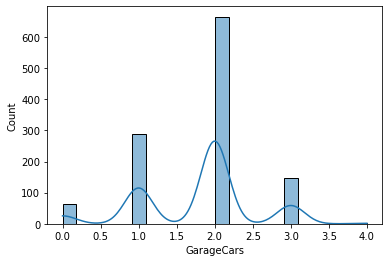

Histplot for  GarageArea


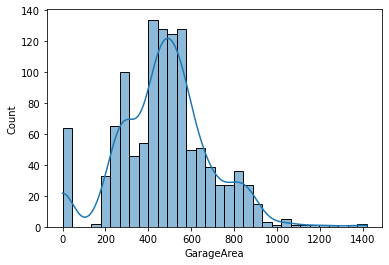

Histplot for  WoodDeckSF


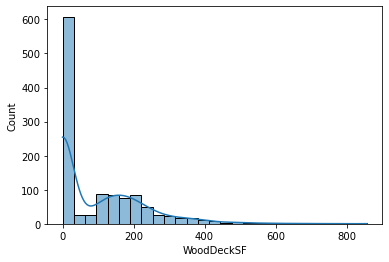

Histplot for  OpenPorchSF


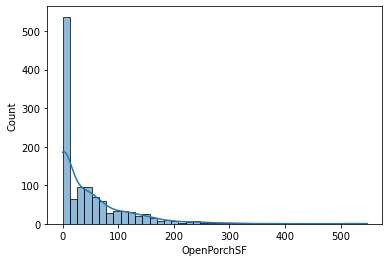

Histplot for  EnclosedPorch


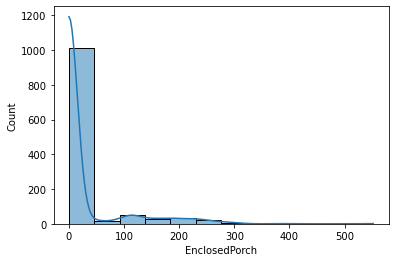

Histplot for  3SsnPorch


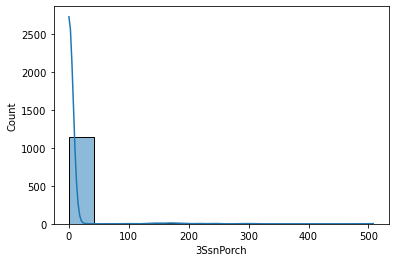

Histplot for  ScreenPorch


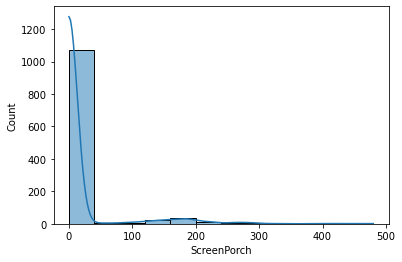

Histplot for  PoolArea


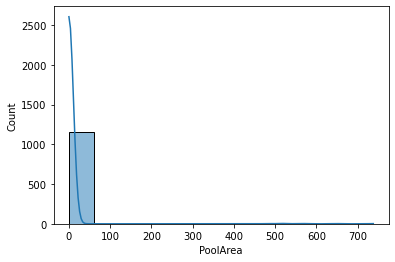

Histplot for  MiscVal


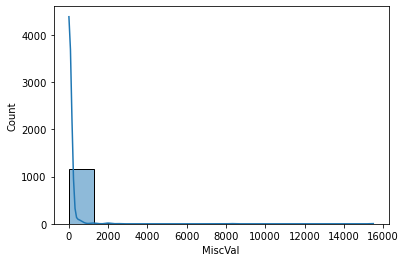

Histplot for  MoSold


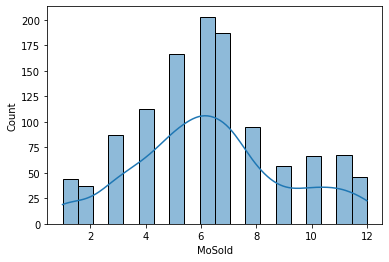

Histplot for  YrSold


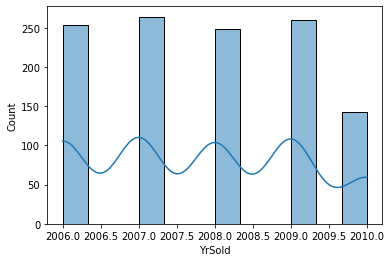

Histplot for  SalePrice


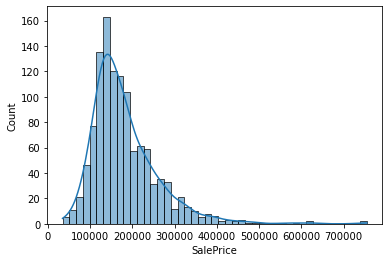

In [15]:
# Ploting Hist plot for continuous type of data
for i in traindf.columns:
    if traindf[i].dtypes!='object':
        print("Histplot for ", i)
        sns.histplot(data=traindf, x=i ,kde=True)
        plt.savefig(r"C:\Users\ADMIN\Pictures\Saved Pictures\Histplot Housing\fig_{0}.png".format(i),pad_inches=1,transparent=True,bbox_inches='tight',dpi=200)
        plt.show()


Scatter Plot for  MSSubClass


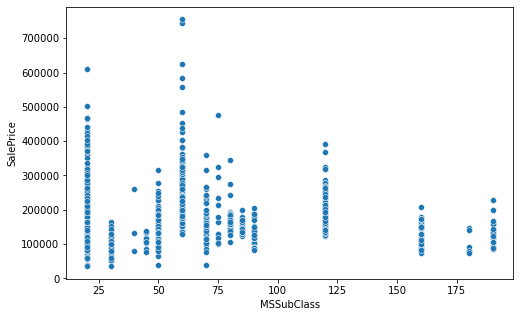

Scatter Plot for  LotFrontage


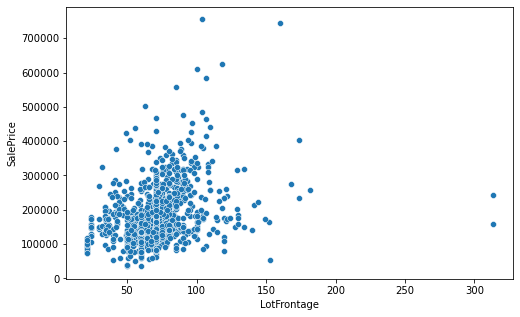

Scatter Plot for  LotArea


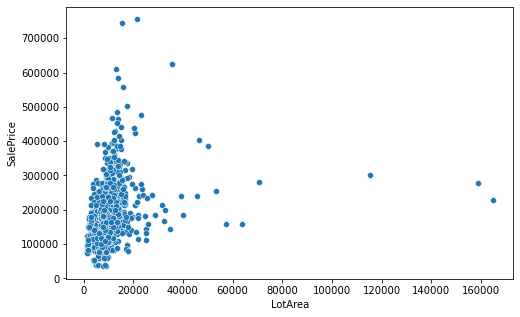

Scatter Plot for  OverallQual


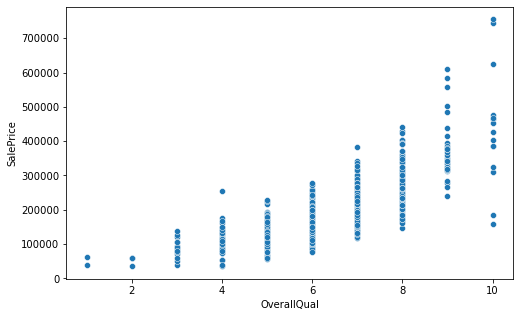

Scatter Plot for  OverallCond


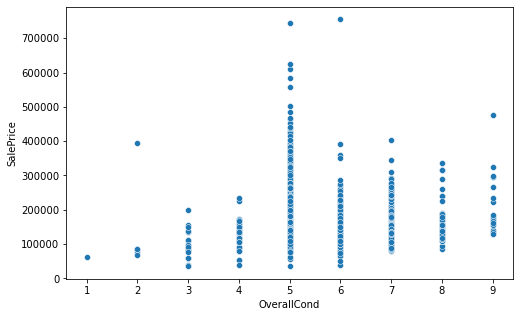

Scatter Plot for  YearBuilt


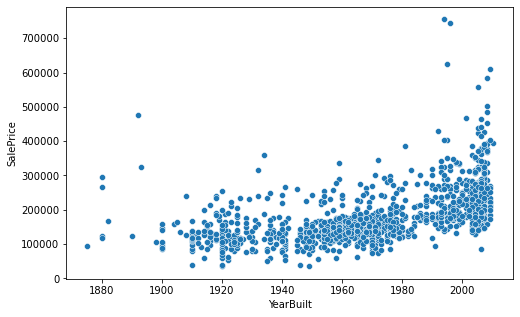

Scatter Plot for  YearRemodAdd


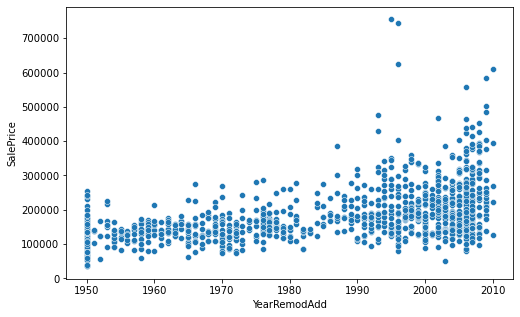

Scatter Plot for  MasVnrArea


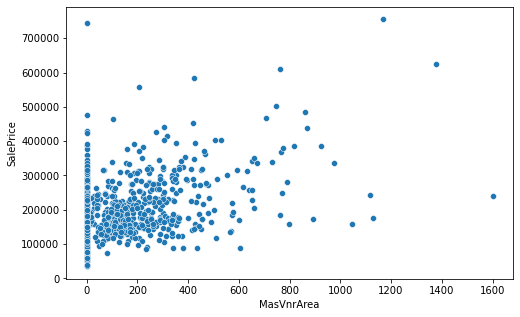

Scatter Plot for  BsmtFinSF1


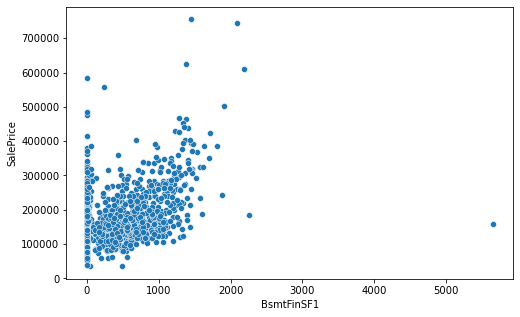

Scatter Plot for  BsmtFinSF2


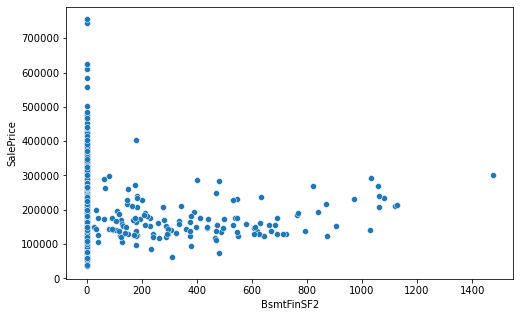

Scatter Plot for  BsmtUnfSF


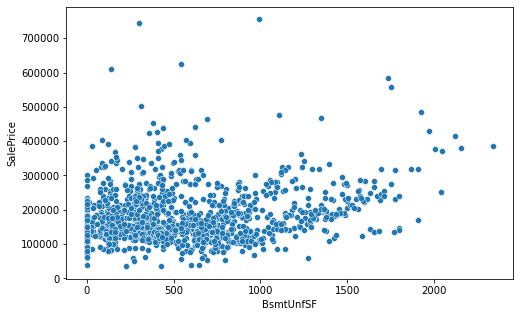

Scatter Plot for  TotalBsmtSF


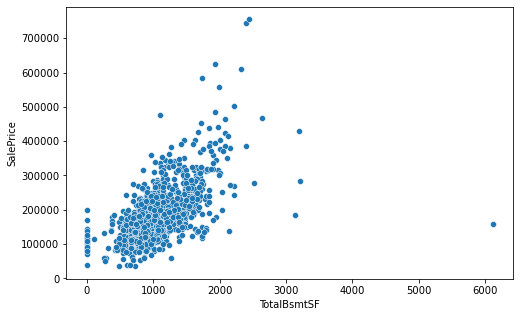

Scatter Plot for  1stFlrSF


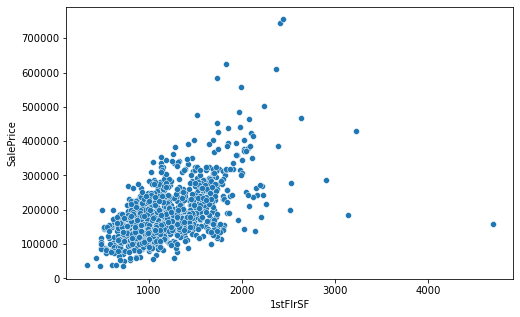

Scatter Plot for  2ndFlrSF


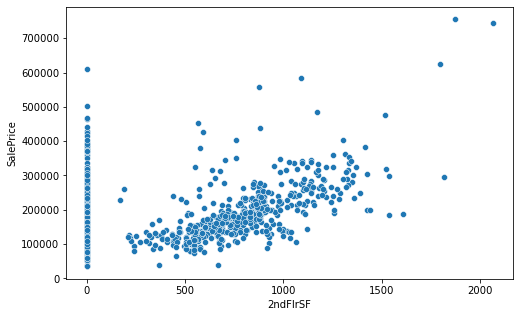

Scatter Plot for  LowQualFinSF


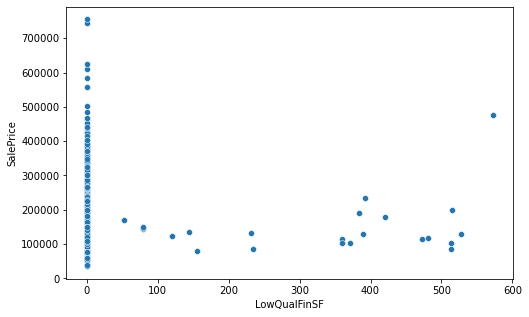

Scatter Plot for  GrLivArea


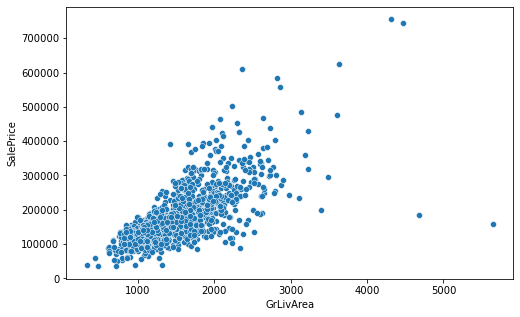

Scatter Plot for  BsmtFullBath


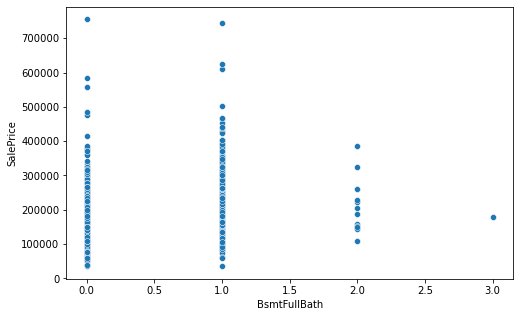

Scatter Plot for  BsmtHalfBath


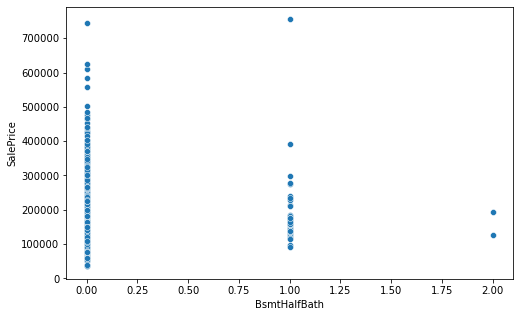

Scatter Plot for  FullBath


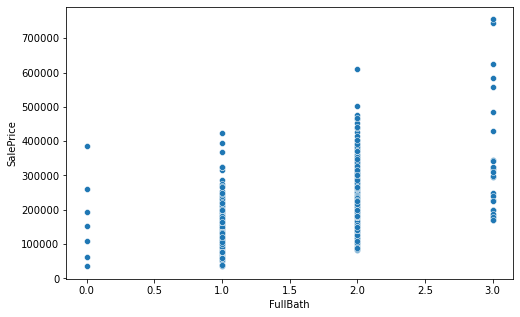

Scatter Plot for  HalfBath


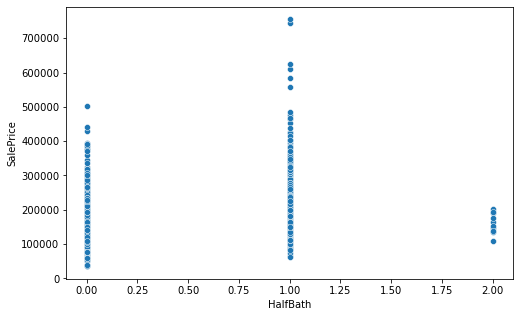

Scatter Plot for  BedroomAbvGr


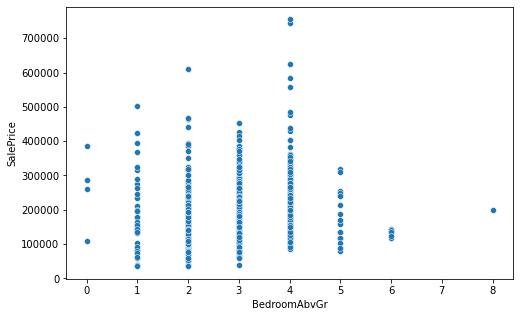

Scatter Plot for  KitchenAbvGr


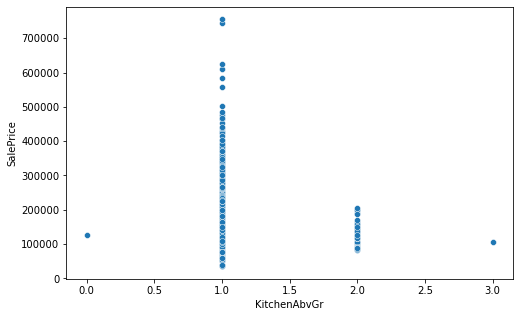

Scatter Plot for  TotRmsAbvGrd


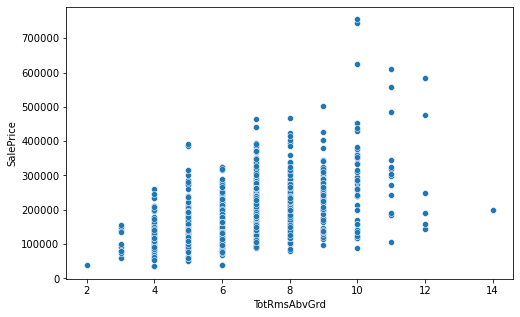

Scatter Plot for  Fireplaces


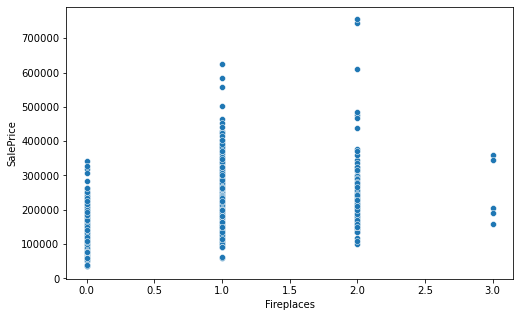

Scatter Plot for  GarageYrBlt


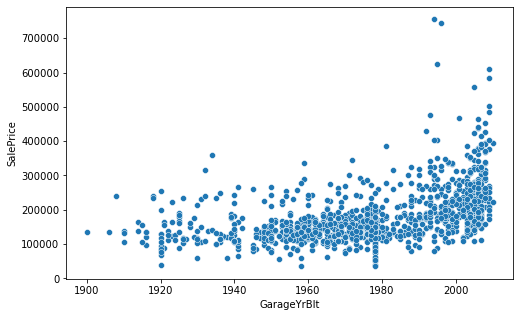

Scatter Plot for  GarageCars


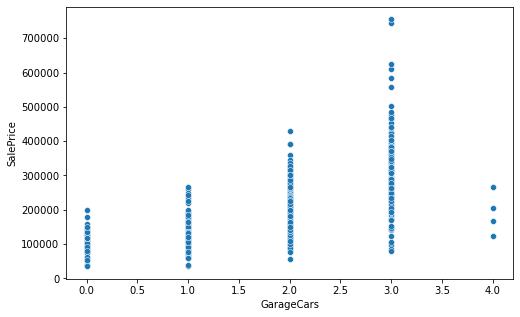

Scatter Plot for  GarageArea


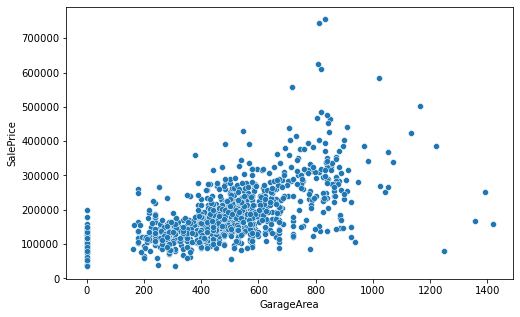

Scatter Plot for  WoodDeckSF


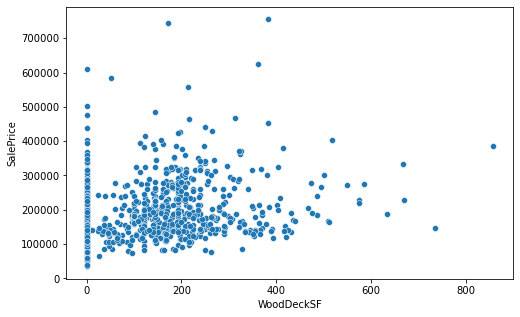

Scatter Plot for  OpenPorchSF


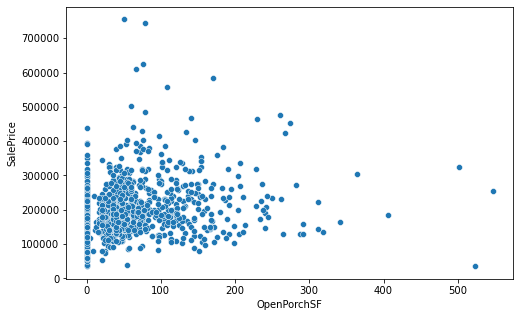

Scatter Plot for  EnclosedPorch


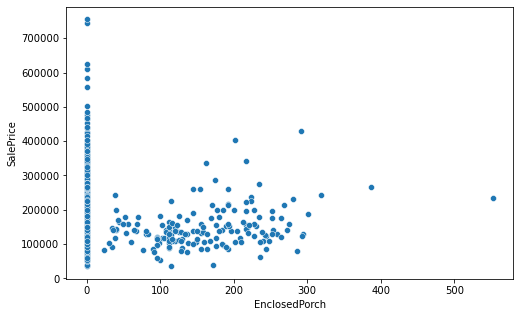

Scatter Plot for  3SsnPorch


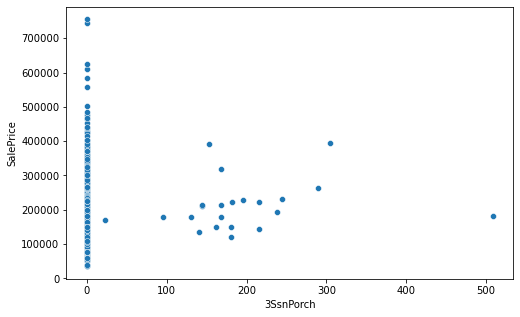

Scatter Plot for  ScreenPorch


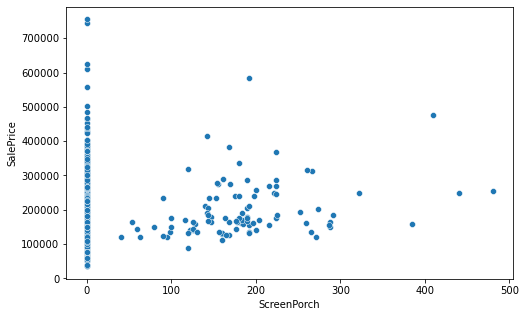

Scatter Plot for  PoolArea


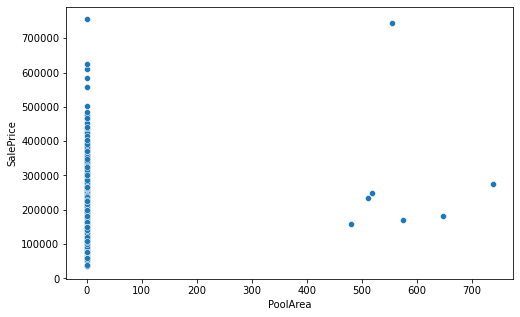

Scatter Plot for  MiscVal


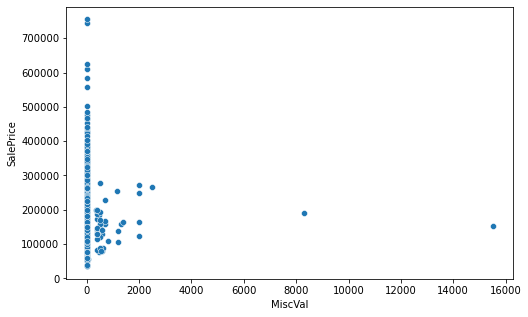

Scatter Plot for  MoSold


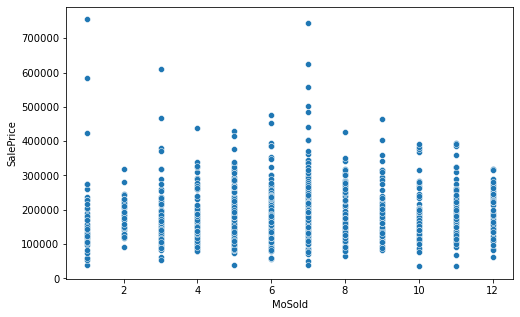

Scatter Plot for  YrSold


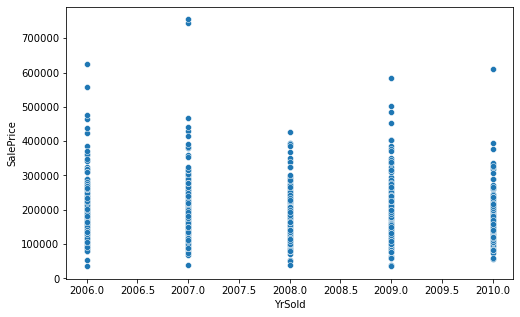

Scatter Plot for  SalePrice


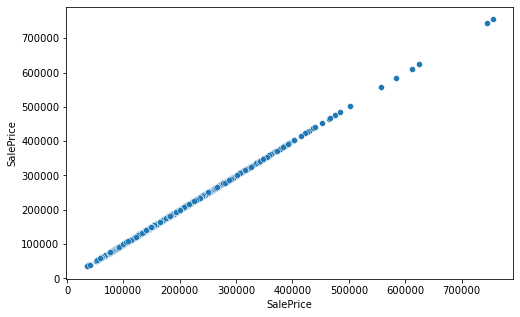

In [16]:
#Plotting Scatter plot of 
for i in traindf.columns:
    if traindf[i].dtypes!='object':
        print("Scatter Plot for ", i)
        plt.figure(figsize=(8,5))
        sns.scatterplot(x=traindf[i], y=traindf['SalePrice'])
        plt.savefig(r"C:\Users\ADMIN\Pictures\Saved Pictures\Scatter Plot Housing\fig_{0}.png".format(i),pad_inches=1,transparent=True,bbox_inches='tight',dpi=200)
        plt.show()


# Conversion of Categorical data in to coding LabelEncoder

In [17]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in traindf.columns:
    if traindf[i].dtypes=='object':
        traindf[i]=le.fit_transform(traindf[i])

traindf        

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            120         3     70.98847     4928       1         0   
1             20         3     95.00000    15865       1         0   
2             60         3     92.00000     9920       1         0   
3             20         3    105.00000    11751       1         0   
4             20         3     70.98847    16635       1         0   
...          ...       ...          ...      ...     ...       ...   
1163          20         3     70.98847     9819       1         0   
1164          20         3     67.00000     8777       1         3   
1165         160         3     24.00000     2280       1         3   
1166          70         0     50.00000     8500       1         3   
1167          60         3     70.98847     7861       1         0   

      LandContour  Utilities  LotConfig  LandSlope  ...  EnclosedPorch  \
0               3          0          4          0  ...              0   
1               3          0          4          1  ...              0   
2               3          0          1          0  ...              0   
3               3          0          4          0  ...              0   
4               3          0          2          0  ...              0   
...           ...        ...        ...        ...  ...            ...   
1163            3          0          4          0  ...              0   
1164            3          0          4          0  ...              0   
1165            3          0          2          0  ...              0   
1166            3          0          4          0  ...            172   
1167            3          0          4          0  ...              0   

      3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  SaleType  \
0             0            0         0        0       2    2007         8   
1             0          224         0        0      10    2007         8   
2             0            0         0        0       6    2007         8   
3             0            0         0        0       1    2010         0   
4             0            0         0        0       6    2009         8   
...         ...          ...       ...      ...     ...     ...       ...   
1163          0            0         0        0       2    2010         8   
1164          0            0         0        0       5    2009         8   
1165          0            0         0        0       7    2009         8   
1166          0            0         0        0       7    2008         8   
1167          0            0         0        0       6    2006         8   

      SaleCondition  SalePrice  
0                 4     128000  
1                 4     268000  
2                 4     269790  
3                 4     190000  
4                 4     215000  
...             ...        ...  
1163              4     122000  
1164              4     108000  
1165              4     148500  
1166              4      40000  
1167              4     183200  

[1168 rows x 75 columns]

**Correlation of the datbase with each other**

In [18]:
corr_mat=traindf.corr()
corr_mat

MSSubClass  MSZoning  LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.007478    -0.336681 -0.124151 -0.035981   
MSZoning         0.007478  1.000000    -0.069661 -0.023328  0.140215   
LotFrontage     -0.336681 -0.069661     1.000000  0.299452 -0.035309   
LotArea         -0.124151 -0.023328     0.299452  1.000000 -0.263973   
Street          -0.035981  0.140215    -0.035309 -0.263973  1.000000   
...                   ...       ...          ...       ...       ...   
MoSold          -0.016015 -0.051646     0.022517  0.015141 -0.008860   
YrSold          -0.038595 -0.004964    -0.003885 -0.035399 -0.019635   
SaleType         0.035050  0.079854    -0.035356  0.005421  0.025920   
SaleCondition   -0.028981  0.004501     0.065091  0.034236  0.014176   
SalePrice       -0.060775 -0.133221     0.323779  0.249499  0.044753   

               LotShape  LandContour  Utilities  LotConfig  LandSlope  ...  \
MSSubClass     0.104485    -0.021387        NaN   0.076880  -0.014930  ...   
MSZoning       0.053655     0.001175        NaN  -0.027246  -0.023952  ...   
LotFrontage   -0.144523    -0.073451        NaN  -0.192468   0.046051  ...   
LotArea       -0.189201    -0.159038        NaN  -0.152063   0.395410  ...   
Street        -0.012941     0.105226        NaN   0.000153  -0.141572  ...   
...                 ...          ...        ...        ...        ...  ...   
MoSold        -0.050418    -0.023872        NaN   0.019084   0.030526  ...   
YrSold         0.021421     0.009499        NaN  -0.009817  -0.005352  ...   
SaleType      -0.015161    -0.041763        NaN  -0.002039   0.056004  ...   
SaleCondition -0.054905     0.047715        NaN   0.043692  -0.061461  ...   
SalePrice     -0.248171     0.032836        NaN  -0.060452   0.015485  ...   

               EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea   MiscVal  \
MSSubClass         -0.004252  -0.043210    -0.013291  0.009583 -0.023503   
MSZoning            0.111221   0.004409     0.030793 -0.001663  0.003416   
LotFrontage         0.020902   0.051084     0.030405  0.196001 -0.001329   
LotArea            -0.007446   0.025794     0.025256  0.097107  0.051679   
Street              0.021360   0.007338     0.016026  0.004505 -0.030354   
...                      ...        ...          ...       ...       ...   
MoSold             -0.036523   0.020406     0.033064 -0.038624 -0.008773   
YrSold             -0.005767   0.014440     0.017312 -0.066063 -0.008439   
SaleType           -0.008234  -0.013696     0.010760  0.014047  0.015900   
SaleCondition      -0.091563   0.001236     0.002670 -0.074354  0.012178   
SalePrice          -0.115004   0.060119     0.100284  0.103280 -0.013071   

                 MoSold    YrSold  SaleType  SaleCondition  SalePrice  
MSSubClass    -0.016015 -0.038595  0.035050      -0.028981  -0.060775  
MSZoning      -0.051646 -0.004964  0.079854       0.004501  -0.133221  
LotFrontage    0.022517 -0.003885 -0.035356       0.065091   0.323779  
LotArea        0.015141 -0.035399  0.005421       0.034236   0.249499  
Street        -0.008860 -0.019635  0.025920       0.014176   0.044753  
...                 ...       ...       ...            ...        ...  
MoSold         1.000000 -0.144536 -0.063667      -0.003462   0.072764  
YrSold        -0.144536  1.000000  0.013606       0.024505  -0.045508  
SaleType      -0.063667  0.013606  1.000000       0.143557  -0.050851  
SaleCondition -0.003462  0.024505  0.143557       1.000000   0.217687  
SalePrice      0.072764 -0.045508 -0.050851       0.217687   1.000000  

[75 rows x 75 columns]

In [22]:
corr_mat['SalePrice'].sort_values(ascending=False)
#.sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.789185
GrLivArea        0.707300
GarageCars       0.628329
GarageArea       0.619000
TotalBsmtSF      0.595042
1stFlrSF         0.587642
FullBath         0.554988
TotRmsAbvGrd     0.528363
YearBuilt        0.514408
YearRemodAdd     0.507831
MasVnrArea       0.463626
Fireplaces       0.459611
GarageYrBlt      0.458007
Foundation       0.374169
BsmtFinSF1       0.362874
OpenPorchSF      0.339500
2ndFlrSF         0.330386
LotFrontage      0.323779
WoodDeckSF       0.315444
HalfBath         0.295592
LotArea          0.249499
CentralAir       0.246754
Electrical       0.234621
PavedDrive       0.231707
SaleCondition    0.217687
BsmtUnfSF        0.215724
BsmtFullBath     0.212924
HouseStyle       0.205502
Neighborhood     0.198942
RoofStyle        0.192654
RoofMatl         0.159865
BedroomAbvGr     0.158281
GarageCond       0.135071
Functional       0.118673
ExterCond        0.115167
Exterior1st      0.108451
Condition1       0.105820
PoolArea    

<AxesSubplot:>

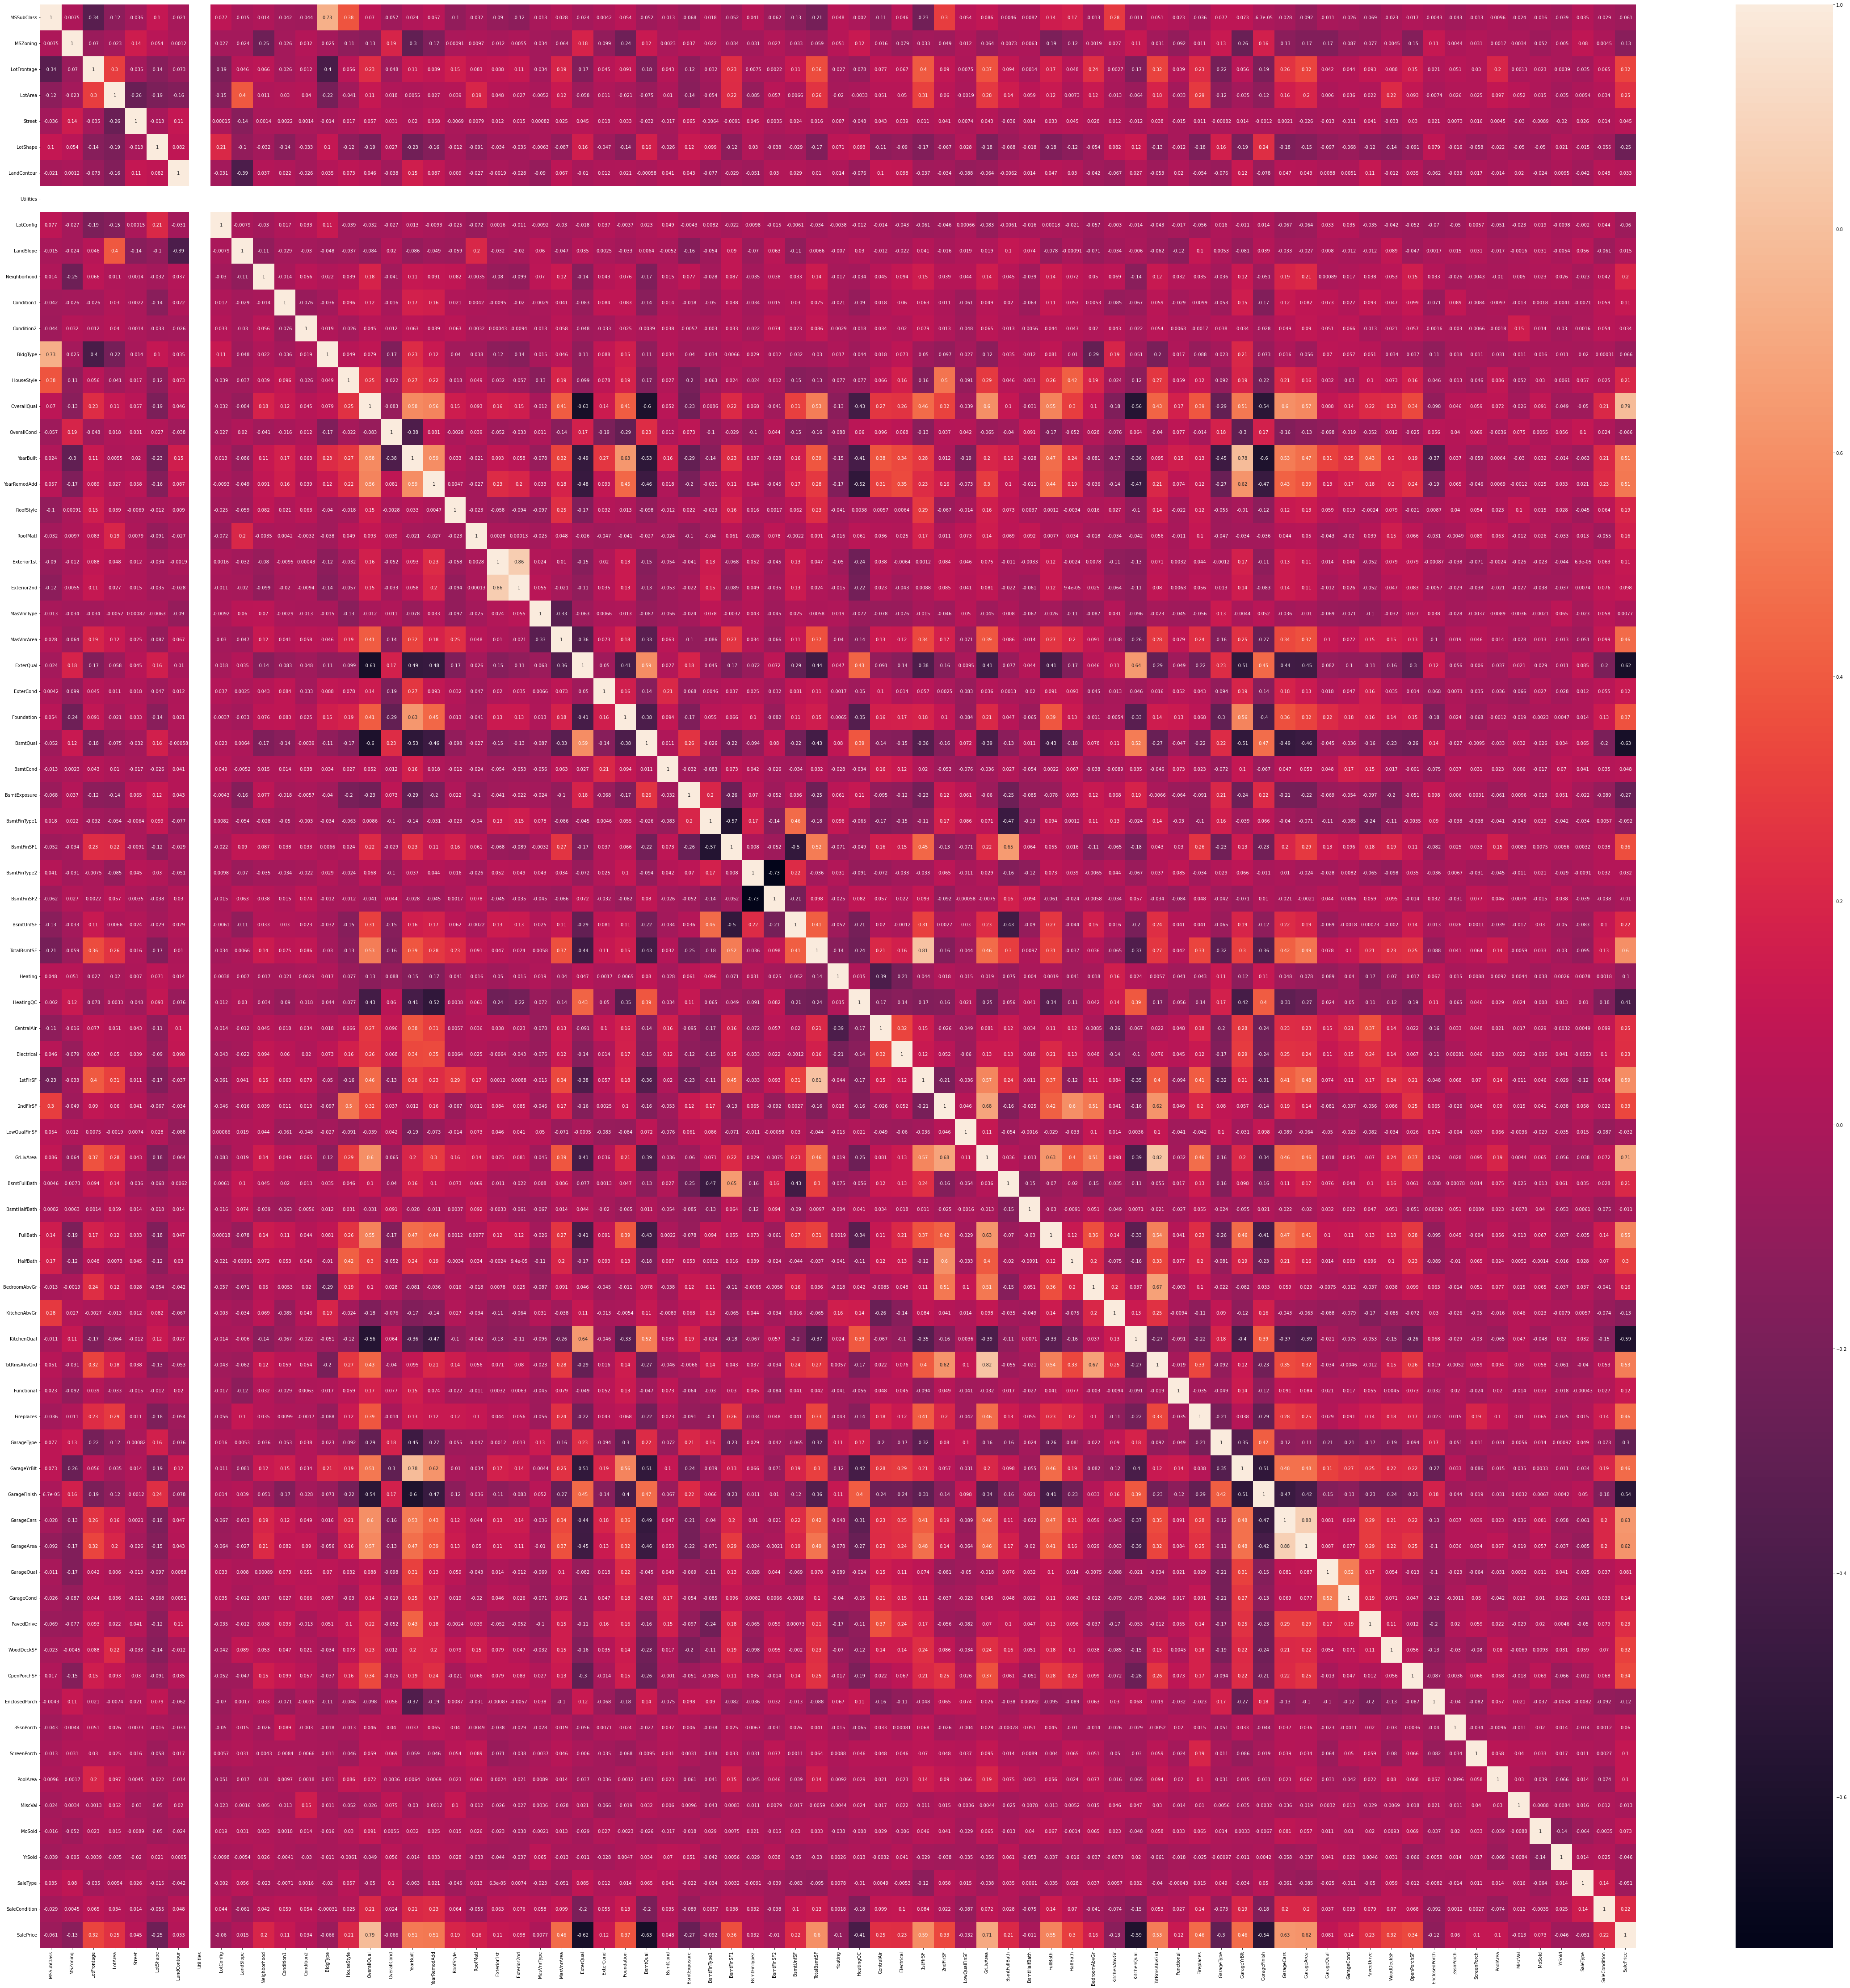

In [21]:
# Plotting Heat map for the correlation
plt.figure(figsize=(80,80))
sns.heatmap(corr_mat,annot=True)

**Observation**

Some Major Positively correlated columns in descending order which may be important

1. OverallQual      0.789185
2. GrLivArea        0.707300
3. GarageCars       0.628329
4. GarageArea       0.619000
5. TotalBsmtSF      0.595042
6. 1stFlrSF         0.587642
7. FullBath         0.554988
8. TotRmsAbvGrd     0.528363
9. YearBuilt        0.514408
10. YearRemodAdd     0.507831
11. MasVnrArea       0.463626
12. Fireplaces       0.459611
13. GarageYrBlt      0.458007
14. Foundation       0.374169
15. BsmtFinSF1       0.362874
16. OpenPorchSF      0.339500
17. 2ndFlrSF         0.330386
18. LotFrontage      0.323779
19. WoodDeckSF       0.315444
20. HalfBath         0.295592
21. LotArea          0.249499
22. CentralAir       0.246754
23. Electrical       0.234621
24. PavedDrive       0.231707
25. SaleCondition    0.217687
26. BsmtUnfSF        0.215724
27. BsmtFullBath     0.212924
28. HouseStyle       0.205502
29. Neighborhood     0.198942
30. RoofStyle        0.192654
31. RoofMatl         0.159865
32. BedroomAbvGr     0.158281
33. GarageCond       0.135071
34. Functional       0.118673
35. ExterCond        0.115167
36. Exterior1st      0.108451
37. Condition1       0.105820
38. PoolArea         0.103280
38. ScreenPorch      0.100284

Some Major Positively correlated columns in descending order which may be important

1. Heating         -0.100021
2. EnclosedPorch   -0.115004
3. KitchenAbvGr    -0.132108
4. MSZoning        -0.133221
5. LotShape        -0.248171
6. BsmtExposure    -0.268559
7. GarageType      -0.299470
8. HeatingQC       -0.406604
9. GarageFinish    -0.537121
10. KitchenQual     -0.592468
11. ExterQual       -0.624820
12. BsmtQual        -0.626850

Remaining are not having considerable correlation with SalePrice can be dropped
1. Exterior2nd      0.097541
2. GarageQual       0.080795
3. MoSold           0.072764
4. 3SsnPorch        0.060119
5. BsmtCond         0.048125
6. Street           0.044753
7. Condition2       0.033956
8. LandContour      0.032836
9. BsmtFinType2     0.032285
10. LandSlope        0.015485
11. MasVnrType       0.007732
12. BsmtFinSF2      -0.010151
13. BsmtHalfBath    -0.011109
14. MiscVal         -0.013071
15. LowQualFinSF    -0.032381
16. YrSold          -0.045508
17. SaleType        -0.050851
18. LotConfig       -0.060452
19. MSSubClass      -0.060775
20. OverallCond     -0.065642
21. BldgType        -0.066028
22. BsmtFinType1    -0.092109
23. Heating         -0.100021

**Dropping these columns as the correlation with target is less than +/-10%**
Exterior2nd,GarageQual,MoSold,3SsnPorch,BsmtCond,Street,Condition2,LandContour,BsmtFinType2,LandSlope,MasVnrType,BsmtFinSF2,BsmtHalfBath,MiscVal,LowQualFinSF,YrSold,SaleType,LotConfig,MSSubClass,OverallCond,BldgType,BsmtFinType1,Heating         

**Skewness of the data**

In [18]:
#Checking Skewness
traindf.skew().sort_values(ascending=False)
#sort_values(ascending=False)

MiscVal       23.065943
PoolArea      13.243711
Condition2    11.514458
LotArea       10.659285
Heating       10.103609
                ...    
SaleType      -3.660513
Functional    -3.999663
GarageQual    -4.582386
GarageCond    -5.422472
Street       -17.021969
Length: 75, dtype: float64

Multiple columns are having skewness in the data to be trated further

**Droping the columns which are less correlated and having maximum of skewness and has the outliers too**
1. Uilities can be dropped because of having only one value and less correlation with target
2. MiscVal is having 23.06 skewness and less correlation
3. Pool Area is 10% correlated very weak bond with the target but giving the skewness 13.
4. Condition2 is 3% correlated with the target and having 11 skewness 
5. Street is also 4% correlated with target  and having -17 skewness
6. 3SsnPorch is 6% correlated and 9 skewness 

In [16]:
#**Droping the utilities column as that is having only single value for entire data set which is irrelevant**
# Dropping columns according to the correlation of less than 10% and greaterthan -10% with target variable 
traindf=traindf.drop(['MiscVal','PoolArea','Condition2','Utilities','Exterior2nd','GarageQual','MoSold','3SsnPorch','BsmtCond','Street','Condition2','LandContour','BsmtFinType2','LandSlope','MasVnrType','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','SaleType','LotConfig','MSSubClass','OverallCond','BldgType','BsmtFinType1','Heating'],axis=1) 
traindf.shape

(1168, 50)

In [17]:
traindf.skew()

MSZoning         -1.796785
LotFrontage       2.710383
LotArea          10.659285
LotShape         -0.603775
Neighborhood      0.043735
Condition1        3.008289
HouseStyle        0.285680
OverallQual       0.175082
YearBuilt        -0.579204
YearRemodAdd     -0.495864
RoofStyle         1.498560
RoofMatl          7.577352
Exterior1st      -0.612816
MasVnrArea        2.834658
ExterQual        -1.810843
ExterCond        -2.516219
Foundation       -0.002761
BsmtQual         -1.343781
BsmtExposure     -1.166987
BsmtFinSF1        1.871606
BsmtUnfSF         0.909057
TotalBsmtSF       1.744591
HeatingQC         0.449933
CentralAir       -3.475188
Electrical       -3.104209
1stFlrSF          1.513707
2ndFlrSF          0.823479
GrLivArea         1.449952
BsmtFullBath      0.627106
FullBath          0.057809
HalfBath          0.656492
BedroomAbvGr      0.243855
KitchenAbvGr      4.365259
KitchenQual      -1.408106
TotRmsAbvGrd      0.644657
Functional       -3.999663
Fireplaces        0.671966
G

In [18]:
# spliting data into x and y

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabe

<Figure size 2880x2880 with 0 Axes>

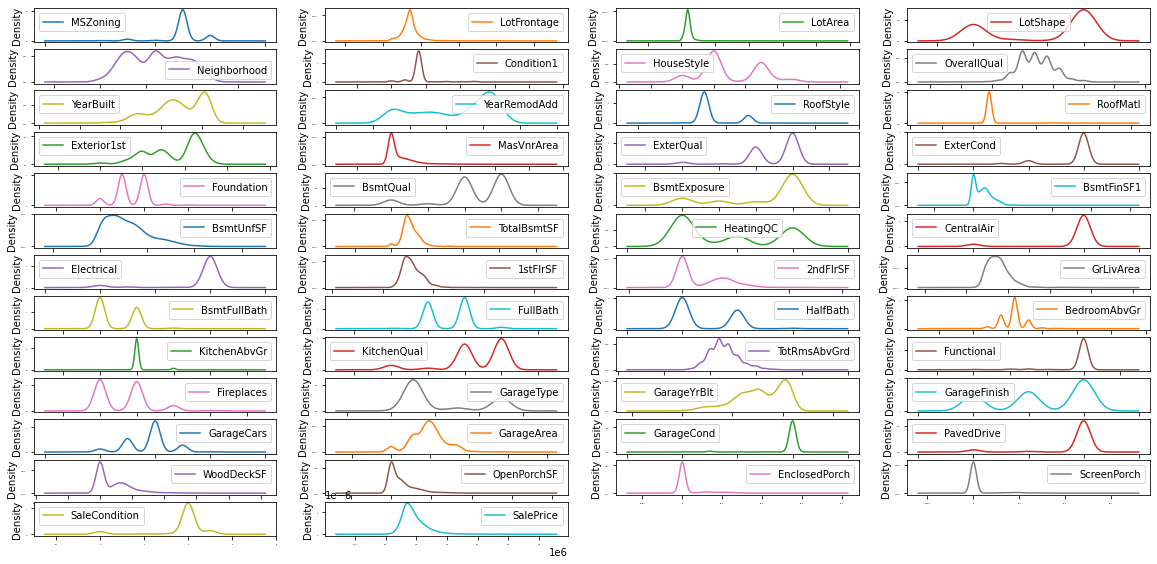

In [19]:
#Checking Skewness with density graphs also
plt.figure(figsize=(40,40))
traindf.plot(kind='density', subplots=True, layout=(20,4), sharex=False, legend=True, fontsize=2,figsize=(20,15))

We can see that the data is not normally distributed skewed we have to treat it further

**outliers in the data**

Box Plot for  MSZoning


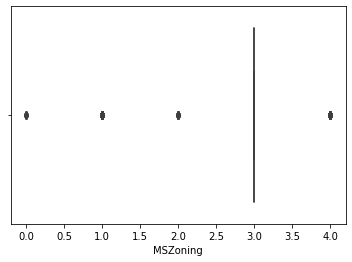

Box Plot for  LotFrontage


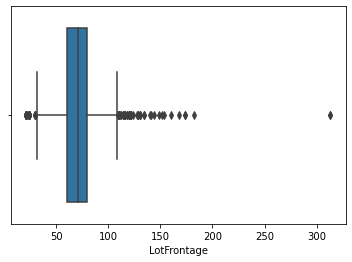

Box Plot for  LotArea


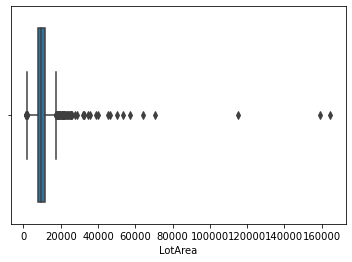

Box Plot for  LotShape


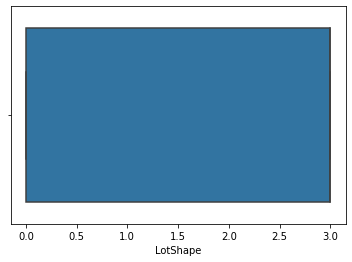

Box Plot for  Neighborhood


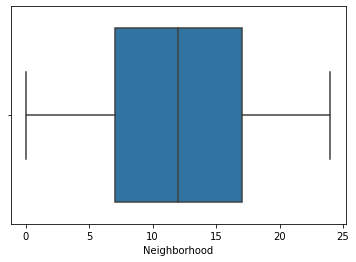

Box Plot for  Condition1


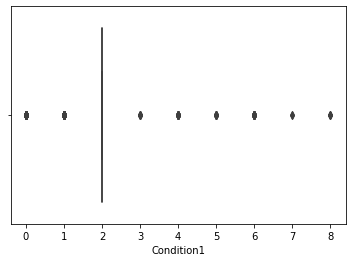

Box Plot for  HouseStyle


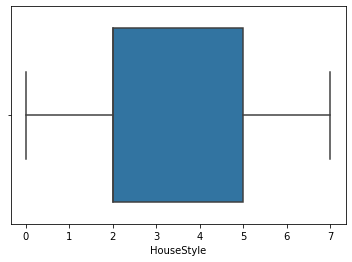

Box Plot for  OverallQual


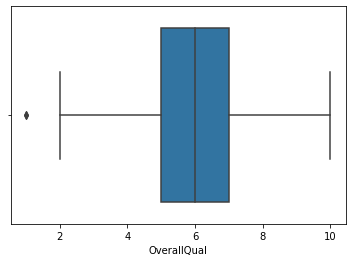

Box Plot for  YearBuilt


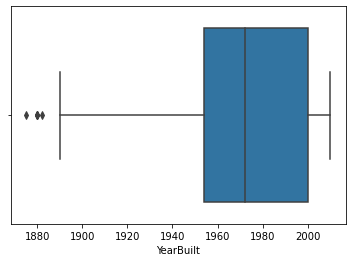

Box Plot for  YearRemodAdd


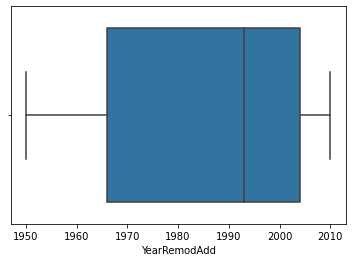

Box Plot for  RoofStyle


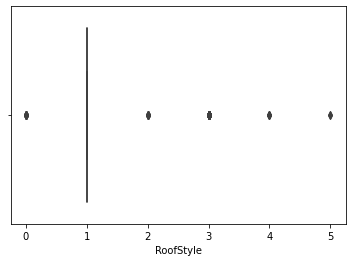

Box Plot for  RoofMatl


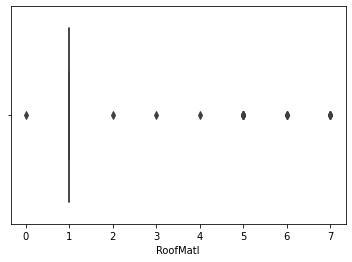

Box Plot for  Exterior1st


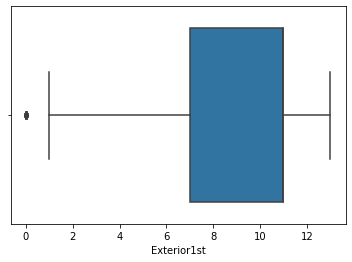

Box Plot for  MasVnrArea


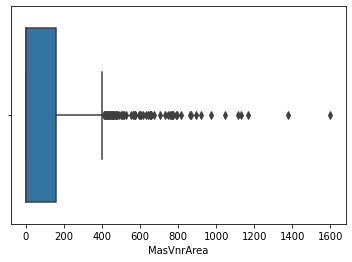

Box Plot for  ExterQual


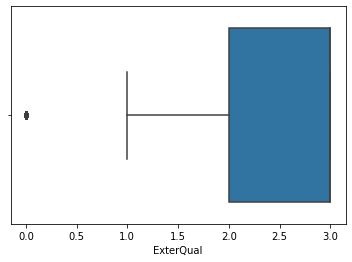

Box Plot for  ExterCond


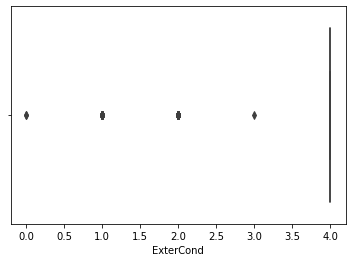

Box Plot for  Foundation


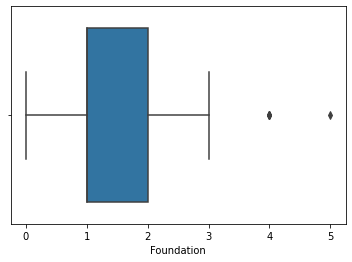

Box Plot for  BsmtQual


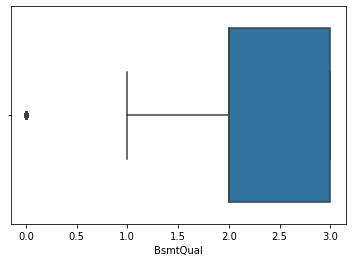

Box Plot for  BsmtExposure


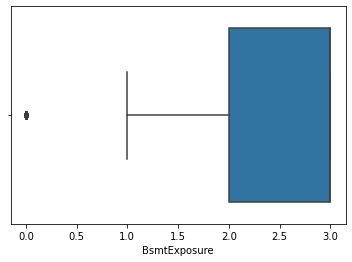

Box Plot for  BsmtFinSF1


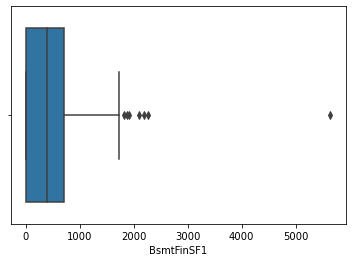

Box Plot for  BsmtUnfSF


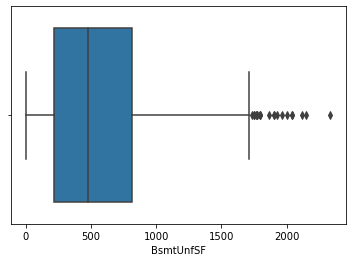

Box Plot for  TotalBsmtSF


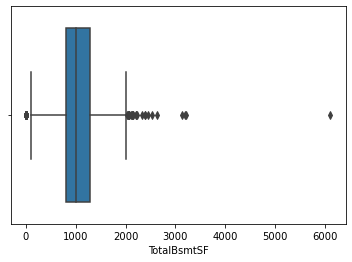

Box Plot for  HeatingQC


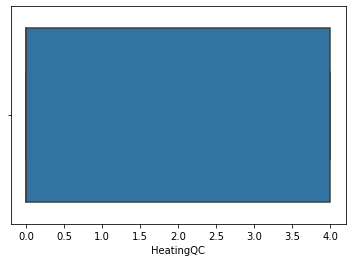

Box Plot for  CentralAir


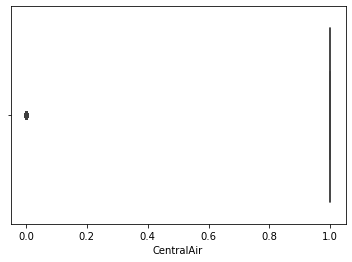

Box Plot for  Electrical


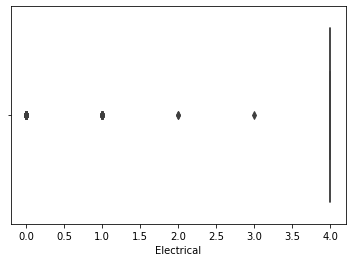

Box Plot for  1stFlrSF


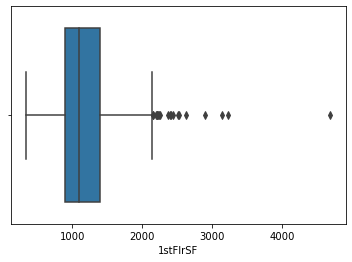

Box Plot for  2ndFlrSF


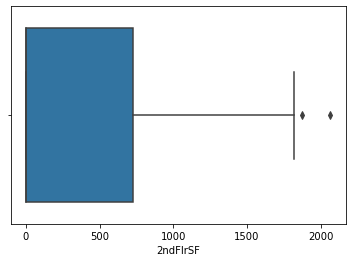

Box Plot for  GrLivArea


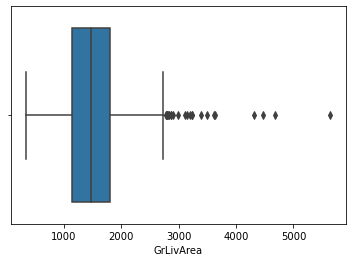

Box Plot for  BsmtFullBath


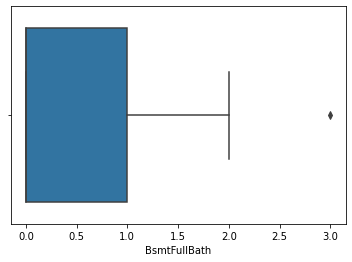

Box Plot for  FullBath


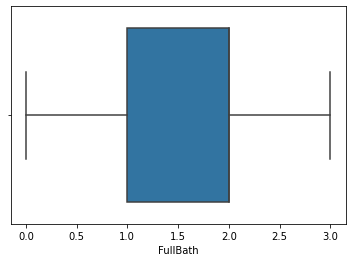

Box Plot for  HalfBath


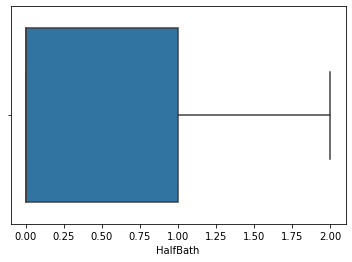

Box Plot for  BedroomAbvGr


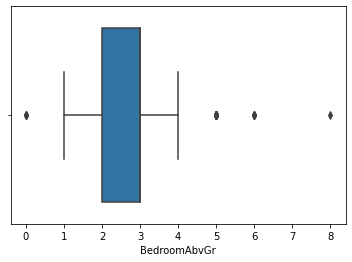

Box Plot for  KitchenAbvGr


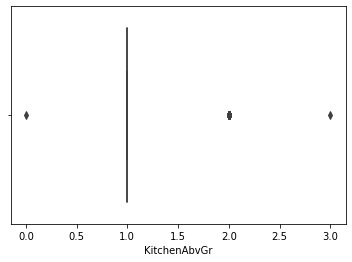

Box Plot for  KitchenQual


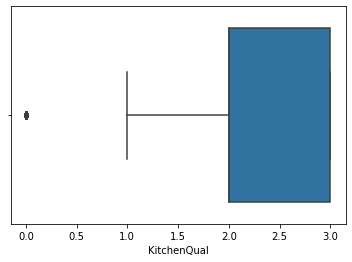

Box Plot for  TotRmsAbvGrd


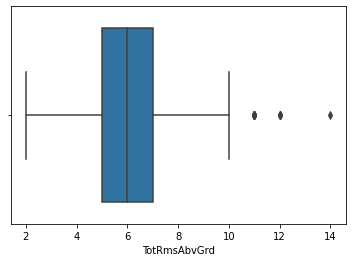

Box Plot for  Functional


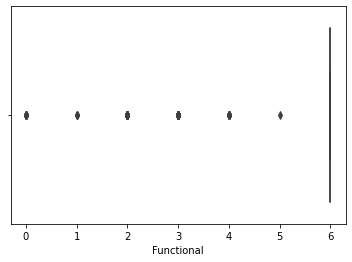

Box Plot for  Fireplaces


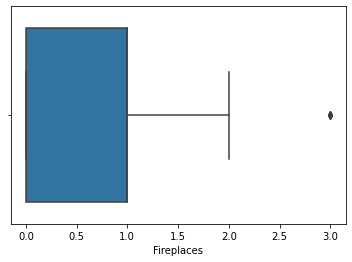

Box Plot for  GarageType


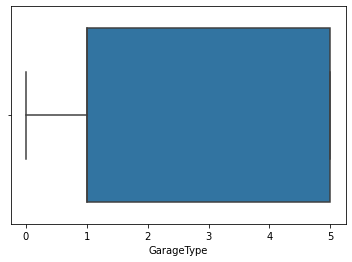

Box Plot for  GarageYrBlt


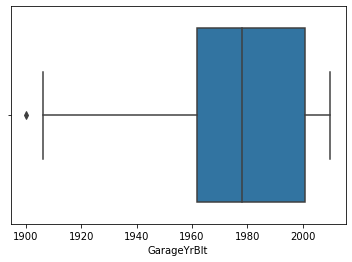

Box Plot for  GarageFinish


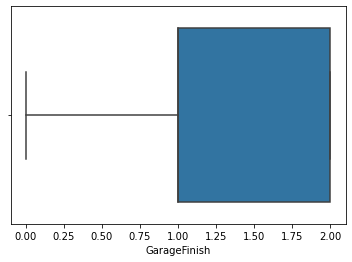

Box Plot for  GarageCars


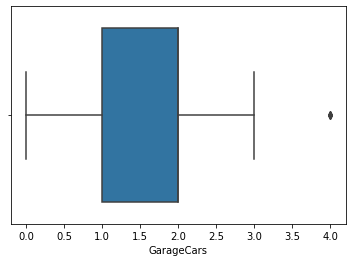

Box Plot for  GarageArea


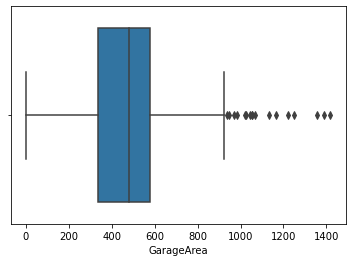

Box Plot for  GarageCond


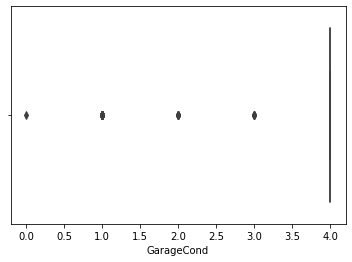

Box Plot for  PavedDrive


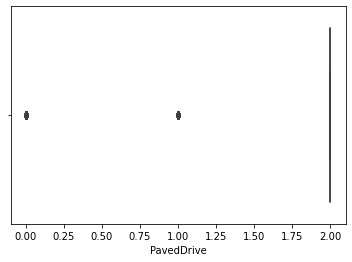

Box Plot for  WoodDeckSF


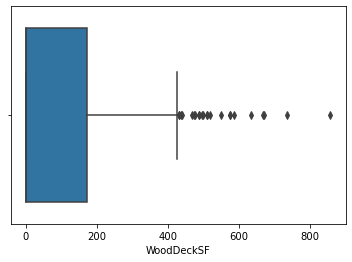

Box Plot for  OpenPorchSF


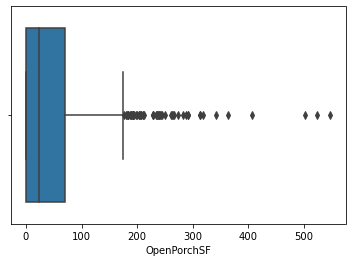

Box Plot for  EnclosedPorch


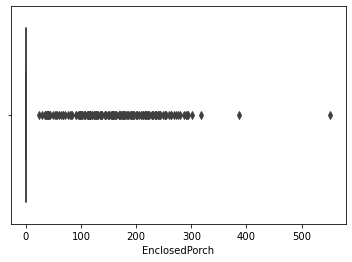

Box Plot for  ScreenPorch


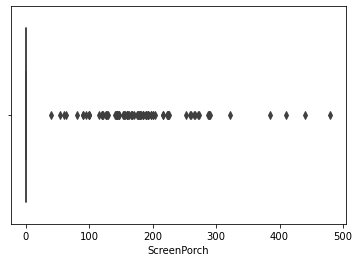

Box Plot for  SaleCondition


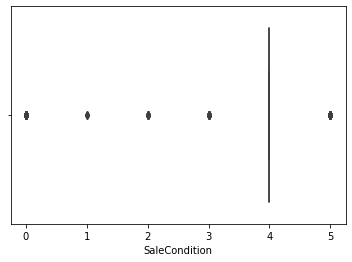

Box Plot for  SalePrice


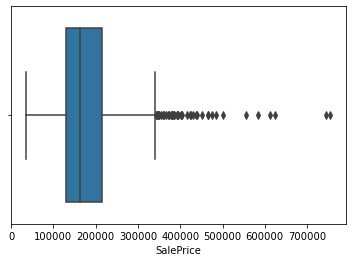

In [19]:
# Checking outliers present in data by box plot
for i in traindf.columns:
    print("Box Plot for ", i)
    sns.boxplot(x=traindf[i])
    plt.show()

As we can see that for outliers are present in multiple column especially in the columns of numeric data, outliers will be treated further

# Pre-Processing

**Treating the outliers in the data**

In [20]:
#splitting into inputs and target variables
x=traindf.drop(['SalePrice'],axis=1)
x.shape

(1168, 49)

In [21]:
y=traindf['SalePrice']
y.shape

(1168,)

In [22]:
# **Removing skewness**
# Importing library to use PowerTransform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-0.16245555,  0.09365762, -1.21395355, ..., -0.41130111,
        -0.29755136,  0.02973497],
       [-0.16245555,  1.11713521,  1.1005215 , ..., -0.41130111,
         3.36078724,  0.02973497],
       [-0.16245555,  0.99880298,  0.15804797, ..., -0.41130111,
        -0.29755136,  0.02973497],
       ...,
       [-0.16245555, -2.8528568 , -2.68183468, ..., -0.41130111,
        -0.29755136,  0.02973497],
       [-2.92646435, -0.99629595, -0.14820341, ...,  2.43334431,
        -0.29755136,  0.02973497],
       [-0.16245555,  0.09365762, -0.30241616, ..., -0.41130111,
        -0.29755136,  0.02973497]])

In [23]:
# Checking the skeness again
sk=pd.DataFrame(x)
sk.skew()

0     0.233113
1     0.161368
2     0.032509
3    -0.594207
4    -0.146541
5     0.225468
6    -0.080331
7     0.021658
8    -0.126641
9    -0.225131
10   -0.292233
11   -6.314987
12   -0.338023
13    0.416370
14   -0.605112
15   -2.270791
16    0.004296
17   -0.413999
18   -0.914214
19   -0.404528
20   -0.284390
21    0.286779
22    0.156511
23   -3.475188
24   -3.006845
25   -0.002391
26    0.280208
27   -0.000054
28    0.365488
29   -0.045944
30    0.498003
31    0.116498
32   -2.370593
33   -0.435558
34    0.002332
35   -3.343664
36    0.084950
37    0.222501
38   -0.132523
39   -0.335248
40   -0.022970
41   -0.320370
42   -4.925781
43   -3.025809
44    0.113026
45   -0.002749
46    2.022616
47    3.067153
48   -0.353292
dtype: float64

In [24]:
# importing zscore
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(1168, 49)

In [25]:
threshold=3
outliers=np.where(z>3)
print(outliers)

(array([   1,    1,    1,    6,    6,    7,    8,   10,   14,   15,   18,
         22,   26,   28,   29,   31,   32,   32,   34,   34,   38,   39,
         39,   39,   40,   43,   46,   48,   48,   48,   48,   48,   48,
         48,   48,   49,   51,   51,   52,   52,   52,   52,   52,   52,
         54,   56,   58,   60,   60,   68,   68,   72,   72,   73,   76,
         76,   76,   77,   77,   81,   82,   85,   86,   86,   89,   90,
         91,   93,   93,   94,   95,   96,   96,   98,   98,  101,  103,
        103,  103,  106,  107,  112,  113,  119,  119,  119,  119,  120,
        121,  123,  123,  123,  124,  124,  126,  127,  128,  130,  135,
        137,  138,  141,  141,  142,  150,  159,  159,  159,  160,  170,
        171,  171,  174,  174,  176,  177,  177,  180,  180,  181,  181,
        182,  184,  190,  191,  195,  195,  196,  196,  197,  197,  197,
        200,  205,  205,  205,  209,  210,  210,  210,  210,  210,  211,
        211,  211,  212,  216,  221,  221,  225,  

In [26]:
import sys
np.set_printoptions(threshold=sys.maxsize)
print(outliers)

(array([   1,    1,    1,    6,    6,    7,    8,   10,   14,   15,   18,
         22,   26,   28,   29,   31,   32,   32,   34,   34,   38,   39,
         39,   39,   40,   43,   46,   48,   48,   48,   48,   48,   48,
         48,   48,   49,   51,   51,   52,   52,   52,   52,   52,   52,
         54,   56,   58,   60,   60,   68,   68,   72,   72,   73,   76,
         76,   76,   77,   77,   81,   82,   85,   86,   86,   89,   90,
         91,   93,   93,   94,   95,   96,   96,   98,   98,  101,  103,
        103,  103,  106,  107,  112,  113,  119,  119,  119,  119,  120,
        121,  123,  123,  123,  124,  124,  126,  127,  128,  130,  135,
        137,  138,  141,  141,  142,  150,  159,  159,  159,  160,  170,
        171,  171,  174,  174,  176,  177,  177,  180,  180,  181,  181,
        182,  184,  190,  191,  195,  195,  196,  196,  197,  197,  197,
        200,  205,  205,  205,  209,  210,  210,  210,  210,  210,  211,
        211,  211,  212,  216,  221,  221,  225,  

In [27]:
x_new=x[(z<3).all(axis=1)]
x_new.shape

(716, 49)

In [28]:
# Calculating loss
loss=(1168-716)/1168*100
loss


38.6986301369863

**With zscore the outliers are 39%, hence we do not remove the outliers as they can add information to the model training** 

# Modelling 

In [29]:
# importing Linear Regression and metrics for it
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split

Finding the best random state

In [30]:
maxr2=0
maxrs=0
lr=LinearRegression()
for i in range(0,200):
    print("Random State is ", i)
    xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=i)
    lr.fit(xtrain,ytrain)
    predtrain=lr.predict(xtrain)
    predtest=lr.predict(xtest)
    print('training accuracy is ', r2_score(ytrain,predtrain))
    score=r2_score(ytest,predtest)
    print('testing accuracy is ', score)
    print("\n")
    
    if score>maxr2:
        maxr2=score
        maxrs=i
        
        
print("maximum r2 score is ", maxr2 , "at random state ", maxrs)

Random State is  0
training accuracy is  0.8234924266028653
testing accuracy is  0.8074460963236963


Random State is  1
training accuracy is  0.8269426077146755
testing accuracy is  0.7830769222027472


Random State is  2
training accuracy is  0.8347364446451162
testing accuracy is  0.7583145580336009


Random State is  3
training accuracy is  0.8163444084857769
testing accuracy is  0.8451272683265603


Random State is  4
training accuracy is  0.8256924243861405
testing accuracy is  0.7768290128980947


Random State is  5
training accuracy is  0.8354284636793115
testing accuracy is  0.7209180842097427


Random State is  6
training accuracy is  0.8214315222786039
testing accuracy is  0.8232882565165073


Random State is  7
training accuracy is  0.8347966538666379
testing accuracy is  0.7681556901626673


Random State is  8
training accuracy is  0.816812902030349
testing accuracy is  0.8324495399280458


Random State is  9
training accuracy is  0.8153924928780175
testing accuracy is  0.

Random State is  103
training accuracy is  0.8209198327897426
testing accuracy is  0.8205129964709179


Random State is  104
training accuracy is  0.8243669414107491
testing accuracy is  0.8042741456154286


Random State is  105
training accuracy is  0.8336214011369185
testing accuracy is  0.722329503208077


Random State is  106
training accuracy is  0.8392774332587994
testing accuracy is  0.7517854418245772


Random State is  107
training accuracy is  0.815028947140475
testing accuracy is  0.8480854307342841


Random State is  108
training accuracy is  0.8379633812773559
testing accuracy is  0.7113211655236604


Random State is  109
training accuracy is  0.8266827629970184
testing accuracy is  0.7817041792891216


Random State is  110
training accuracy is  0.8334892137446533
testing accuracy is  0.7772003771063758


Random State is  111
training accuracy is  0.8203564728397588
testing accuracy is  0.8249195338732963


Random State is  112
training accuracy is  0.8215679222338258
test

training accuracy is  0.8408354059131946
testing accuracy is  0.6321222894280614


Random State is  193
training accuracy is  0.8236397715452841
testing accuracy is  0.8089100422561692


Random State is  194
training accuracy is  0.8290255608575876
testing accuracy is  0.7887921107843899


Random State is  195
training accuracy is  0.814804203185915
testing accuracy is  0.8522615499605195


Random State is  196
training accuracy is  0.817839577988482
testing accuracy is  0.8412985985254481


Random State is  197
training accuracy is  0.8189296994025499
testing accuracy is  0.8308675902962107


Random State is  198
training accuracy is  0.8151901791757088
testing accuracy is  0.8377531785566819


Random State is  199
training accuracy is  0.8283329204979151
testing accuracy is  0.7917887870281751


maximum r2 score is  0.862819944657005 at random state  94


It should be noted that the maximum r2 score is  0.862819944657005 at random state  94

In [31]:
# splitting the model in to train test split according to above result

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=94)

In [32]:
#running that same model again for other metrics too
lr.fit(x_train,y_train)
predtrainlr=lr.predict(x_train)
predtestlr=lr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainlr))
print('testing accuracy is ', r2_score(y_test,predtestlr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestlr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestlr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestlr)))

training accuracy is  0.8101688493582864
testing accuracy is  0.862819944657005
Mean Squared Error is  861134993.1161891
Mean Absolute Error is  21458.221605554645
Root Mean Squared Error is  29345.10168863262


In [33]:
from sklearn.model_selection import cross_val_score
#Cross validation of the lr model
for j in range(2,10):
    cv_score=cross_val_score(lr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())
    print('training accuracy is ', r2_score(y_train,predtrainlr))
    print('testing accuracy is ', r2_score(y_test,predtestlr))

At fold  2 Mean CV score is  0.7729687425660166
training accuracy is  0.8101688493582864
testing accuracy is  0.862819944657005
At fold  3 Mean CV score is  0.7797458337478504
training accuracy is  0.8101688493582864
testing accuracy is  0.862819944657005
At fold  4 Mean CV score is  0.7813660109295759
training accuracy is  0.8101688493582864
testing accuracy is  0.862819944657005
At fold  5 Mean CV score is  0.7810675248063874
training accuracy is  0.8101688493582864
testing accuracy is  0.862819944657005
At fold  6 Mean CV score is  0.7829851001061292
training accuracy is  0.8101688493582864
testing accuracy is  0.862819944657005
At fold  7 Mean CV score is  0.7853304213182959
training accuracy is  0.8101688493582864
testing accuracy is  0.862819944657005
At fold  8 Mean CV score is  0.7851422227782631
training accuracy is  0.8101688493582864
testing accuracy is  0.862819944657005
At fold  9 Mean CV score is  0.7889438033565247
training accuracy is  0.8101688493582864
testing accurac

In [34]:
# modelling using the Decision tree regressor
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor()
dtr.fit(x_train,y_train)
predtraindtr=dtr.predict(x_train)
predtestdtr=dtr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtraindtr))
print('testing accuracy is ', r2_score(y_test,predtestdtr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestdtr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestdtr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestdtr)))

training accuracy is  1.0
testing accuracy is  0.7617452160879553
Mean Squared Error is  1495622167.457265
Mean Absolute Error is  27132.081196581195
Root Mean Squared Error is  38673.274589272434


In [35]:
#Cross validation of the dtr model
dtr=DecisionTreeRegressor()
for j in range(2,10):
    cvdtr=cross_val_score(dtr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cvdtr.mean())

At fold  2 Mean CV score is  0.562580591885299
At fold  3 Mean CV score is  0.7228224098120455
At fold  4 Mean CV score is  0.7196126098203496
At fold  5 Mean CV score is  0.7168471493874744
At fold  6 Mean CV score is  0.7193687352001028
At fold  7 Mean CV score is  0.7046711791869693
At fold  8 Mean CV score is  0.6989511260926564
At fold  9 Mean CV score is  0.705927934897834


In [36]:
# Modelling with randomForestRegressor

from sklearn.ensemble import RandomForestRegressor

rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
predtrainrfr=rfr.predict(x_train)
predtestrfr=rfr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainrfr))
print('testing accuracy is ', r2_score(y_test,predtestrfr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestrfr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestrfr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestrfr)))

training accuracy is  0.9771271272240164
testing accuracy is  0.8843190581193795
Mean Squared Error is  726176315.0697643
Mean Absolute Error is  18296.65427350427
Root Mean Squared Error is  26947.658804982748


In [37]:
#Cross validation of the rfr model
for j in range(2,10):
    cv_score=cross_val_score(rfr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.8256287808010736
At fold  3 Mean CV score is  0.8561602446938953
At fold  4 Mean CV score is  0.8403176740091738
At fold  5 Mean CV score is  0.8462417868041656
At fold  6 Mean CV score is  0.8574631916256541
At fold  7 Mean CV score is  0.8394460174782951
At fold  8 Mean CV score is  0.8502626809223673
At fold  9 Mean CV score is  0.8537103958247467


In [38]:
# modelling with ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor

etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
predtrainetr=etr.predict(x_train)
predtestetr=etr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainetr))
print('testing accuracy is ', r2_score(y_test,predtestetr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestetr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestetr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestetr)))

training accuracy is  1.0
testing accuracy is  0.8916914464135209
Mean Squared Error is  679896835.6873444
Mean Absolute Error is  17620.823333333334
Root Mean Squared Error is  26074.831460382335


In [39]:
#Cross validation of the etr model
for j in range(2,10):
    cv_score=cross_val_score(etr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.8395902383373827
At fold  3 Mean CV score is  0.849289592726017
At fold  4 Mean CV score is  0.8329356388309745
At fold  5 Mean CV score is  0.8480710471761308
At fold  6 Mean CV score is  0.8541864670854699
At fold  7 Mean CV score is  0.8389380738900399
At fold  8 Mean CV score is  0.8510792415863782
At fold  9 Mean CV score is  0.8474336237296707


In [40]:
# Modelling with SVR

from sklearn.svm import SVR

svr=SVR()
svr.fit(x_train,y_train)
predtrainsvr=svr.predict(x_train)
predtestsvr=svr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainsvr))
print('testing accuracy is ', r2_score(y_test,predtestsvr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestsvr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestsvr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestsvr)))

training accuracy is  -0.06058929354060805
testing accuracy is  -0.13431418115325933
Mean Squared Error is  7120551396.022506
Mean Absolute Error is  58844.85263923079
Root Mean Squared Error is  84383.3597104459


In [41]:
#Cross validation of the svr model
for j in range(2,10):
    cv_score=cross_val_score(svr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  -0.05745817281358223
At fold  3 Mean CV score is  -0.05569815938539269
At fold  4 Mean CV score is  -0.05866554432695076
At fold  5 Mean CV score is  -0.06149153185603935
At fold  6 Mean CV score is  -0.05523783775621468
At fold  7 Mean CV score is  -0.05578323753872315
At fold  8 Mean CV score is  -0.056607164638415475
At fold  9 Mean CV score is  -0.054592547397345696


In [42]:
# Modeling for gradient boosting regresssor
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
predtraingbr=gbr.predict(x_train)
predtestgbr=gbr.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtraingbr))
print('testing accuracy is ', r2_score(y_test,predtestgbr))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestgbr))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestgbr))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestgbr)))

training accuracy is  0.9683733170610908
testing accuracy is  0.9067307800286372
Mean Squared Error is  585488822.6803243
Mean Absolute Error is  16475.213328438833
Root Mean Squared Error is  24196.876300058328


In [43]:
#Cross validation of the gbr model
for j in range(2,10):
    cv_score=cross_val_score(gbr, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.8548638727673241
At fold  3 Mean CV score is  0.8820972157537077
At fold  4 Mean CV score is  0.8540816774232538
At fold  5 Mean CV score is  0.8721273677839383
At fold  6 Mean CV score is  0.8689041972212386
At fold  7 Mean CV score is  0.8462034767400192
At fold  8 Mean CV score is  0.8716590471592547
At fold  9 Mean CV score is  0.8680480176360355


**GradientBoostingRegressor is giving the max r2score of 90.70% and cross val score at 3 is higher at 88.41%**

# Regularization

In [44]:
#Importing libraries for regularization
from sklearn.linear_model import Lasso,Ridge, ElasticNet
from sklearn.model_selection import GridSearchCV

In [45]:
# Doing Lasso Regularization
#HyperParameter Tunning to find out the best parameters
parameters={'alpha':[.00001,0.0001,0.001,0.01,0.1,1,10,100],
            'random_state':list(range(0,10)),
            'max_iter':[10,100,1000,10000],
            'tol': [0.001,0.0001,0.00001,0.000001]}

ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 100, 'max_iter': 100, 'random_state': 0, 'tol': 0.001}


In [46]:
ls=Lasso(alpha=100, max_iter=100, random_state=0, tol=0.001)
ls.fit(x_train,y_train)
predtrainls=ls.predict(x_train)
predtestls=ls.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainls))
print('testing accuracy is ', r2_score(y_test,predtestls))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestls))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestls))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestls)))

training accuracy is  0.8100035595113225
testing accuracy is  0.8644339934362728
Mean Squared Error is  851002952.5586258
Mean Absolute Error is  21119.08705848924
Root Mean Squared Error is  29171.954897788833


In [47]:
#Cross validation of the ls model
for j in range(2,10):
    cv_score=cross_val_score(ls, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.7739970368330585
At fold  3 Mean CV score is  0.7814863124277688
At fold  4 Mean CV score is  0.7826212675606901
At fold  5 Mean CV score is  0.7825292696508954
At fold  6 Mean CV score is  0.7840493727274986
At fold  7 Mean CV score is  0.7868189684721048
At fold  8 Mean CV score is  0.7861943178137782
At fold  9 Mean CV score is  0.7905263311491642


In [48]:
# Doing Ridge Regularization
#HyperParameter Tunning to find out the best parameters
parameters={'alpha':[.00001,0.0001,0.001,0.01,0.1,1,10,100],
            'random_state':list(range(0,10)),
            'max_iter':[10,100,1000,10000],
            'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga', 'lbfgs']}

rg=Ridge()
clf=GridSearchCV(rg,parameters)
clf.fit(x_train,y_train)

print(clf.best_params_)

{'alpha': 100, 'max_iter': 10, 'random_state': 5, 'solver': 'saga'}


In [49]:
rg=Ridge(alpha=100, max_iter=10, random_state=5, solver='saga')
rg.fit(x_train,y_train)
predtrainrg=rg.predict(x_train)
predtestrg=rg.predict(x_test)
print('training accuracy is ', r2_score(y_train,predtrainrg))
print('testing accuracy is ', r2_score(y_test,predtestrg))
print("Mean Squared Error is ",mean_squared_error(y_test,predtestrg))
print("Mean Absolute Error is ",mean_absolute_error(y_test,predtestrg))
print("Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtestrg)))

training accuracy is  0.8076807979947752
testing accuracy is  0.8634710410386365
Mean Squared Error is  857047796.3534214
Mean Absolute Error is  20670.09365359034
Root Mean Squared Error is  29275.378671392475


In [50]:
#Cross validation of the ls model
for j in range(2,10):
    cv_score=cross_val_score(rg, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.7877777324638474
At fold  3 Mean CV score is  0.7928197392851365
At fold  4 Mean CV score is  0.7910691049266529
At fold  5 Mean CV score is  0.7907725062195978
At fold  6 Mean CV score is  0.7917405649158372
At fold  7 Mean CV score is  0.7928442615191517
At fold  8 Mean CV score is  0.7934065896433468
At fold  9 Mean CV score is  0.7959820230077171


**It is seen that with regularization won't increased the score, hence doing the hyper parameter tuning on the Gradient boosting Regressor**

In [52]:
# Hyper Parameter Tuning on Gradient boostingregressor
from sklearn.model_selection import GridSearchCV

parameters = {
    "n_estimators": [10, 20, 50, 100, 200, 500],
    "max_leaf_nodes": [2, 5, 10, 20, 50, 100],
    "learning_rate": [0.01,0.1,0.5, 1],
    "criterion": ['friedman_mse', 'squared_error'],
    "max_features":['auto', 'sqrt', 'log2']}

In [53]:
# calling the GridsearchCV for tuning
GCV = GridSearchCV(GradientBoostingRegressor(), param_grid=parameters)
GCV.fit(x_train, y_train)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'learning_rate': [0.01, 0.1, 0.5, 1],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'max_leaf_nodes': [2, 5, 10, 20, 50, 100],
                         'n_estimators': [10, 20, 50, 100, 200, 500]})

In [57]:
GCV.best_params_

{'criterion': 'friedman_mse',
 'learning_rate': 0.1,
 'max_features': 'log2',
 'max_leaf_nodes': 10,
 'n_estimators': 200}

In [58]:
GCV.best_estimator_

GradientBoostingRegressor(max_features='log2', max_leaf_nodes=10,
                          n_estimators=200)

In [59]:
# Checking score with best parameter
model=GradientBoostingRegressor(n_estimators=200 , max_leaf_nodes=10 , learning_rate=0.1 , criterion='friedman_mse' , max_features='log2' )
model.fit(x_train,y_train)
predtrain=model.predict(x_train)
predtest=model.predict(x_test)
print('model training accuracy is ', r2_score(y_train,predtrain))
print('model testing accuracy is ', r2_score(y_test,predtest))
print("model Mean Squared Error is ",mean_squared_error(y_test,predtest))
print("model Mean Absolute Error is ",mean_absolute_error(y_test,predtest))
print("model Root Mean Squared Error is ",np.sqrt(mean_squared_error(y_test,predtest)))

model training accuracy is  0.9754242949479127
model testing accuracy is  0.9015987101887434
model Mean Squared Error is  617704912.0761095
model Mean Absolute Error is  17001.80568120839
model Root Mean Squared Error is  24853.669992097937


In [60]:
#Cross validation of the gbr model
for j in range(2,10):
    cv_score=cross_val_score(model, x, y, cv=j)
    print('At fold ', j , "Mean CV score is ", cv_score.mean())

At fold  2 Mean CV score is  0.8498263945589621
At fold  3 Mean CV score is  0.8790739538817712
At fold  4 Mean CV score is  0.8495934974047945
At fold  5 Mean CV score is  0.8711452945768439
At fold  6 Mean CV score is  0.8724210657593706
At fold  7 Mean CV score is  0.8643209922839352
At fold  8 Mean CV score is  0.8690594196297509
At fold  9 Mean CV score is  0.8548155525654447


**As we can see that Hypertuning the model is not adding any change in score and cross val score is also good enough to support that training is fair enough**

# Saving Model

In [91]:
import joblib
joblib.dump(GCV.best_estimator_, "Housing_price_prediction.pkl")

['Housing_price_prediction.pkl']

# Loading Test Data

In [56]:
# Loading Test Dataframe
testdf=pd.read_csv("Housing_test.csv")
testdf

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0     337          20       RL         86.0    14157   Pave   NaN      IR1   
1    1018         120       RL          NaN     5814   Pave   NaN      IR1   
2     929          20       RL          NaN    11838   Pave   NaN      Reg   
3    1148          70       RL         75.0    12000   Pave   NaN      Reg   
4    1227          60       RL         86.0    14598   Pave   NaN      IR1   
5     650         180       RM         21.0     1936   Pave   NaN      Reg   
6    1453         180       RM         35.0     3675   Pave   NaN      Reg   
7     152          20       RL        107.0    13891   Pave   NaN      Reg   
8     427          80       RL          NaN    12800   Pave   NaN      Reg   
9     776         120       RM         32.0     4500   Pave   NaN      Reg   
10     30          30       RM         60.0     6324   Pave   NaN      IR1   
11   1425          20       RL          NaN     9503   Pave   NaN      Reg   
12    423          20       RL        100.0    21750   Pave   NaN      Reg   
13   1185          20       RL         50.0    35133   Grvl   NaN      Reg   
14    775          20       RL        110.0    14226   Pave   NaN      Reg   
15    391          50       RL         50.0     8405   Pave  Grvl      Reg   
16   1408          20       RL          NaN     8780   Pave   NaN      IR1   
17    513          20       RL         70.0     9100   Pave   NaN      Reg   
18   1266         160       FV         35.0     3735   Pave   NaN      Reg   
19    173         160       RL         44.0     5306   Pave   NaN      IR1   
20   1150          70       RM         50.0     9000   Pave   NaN      Reg   
21    797          20       RL         71.0     8197   Pave   NaN      Reg   
22    137          20       RL          NaN    10355   Pave   NaN      IR1   
23    706         190       RM         70.0     5600   Pave   NaN      Reg   
24   1377          30       RL         52.0     6292   Pave   NaN      Reg   
25   1177          20       RL         37.0     6951   Pave   NaN      IR1   
26   1456          60       RL         62.0     7917   Pave   NaN      Reg   
27    369          20       RL         78.0     7800   Pave   NaN      Reg   
28   1421          60       RL         90.0    11700   Pave   NaN      Reg   
29    999          30       RM         60.0     9786   Pave   NaN      Reg   
30   1217          90       RM         68.0     8930   Pave   NaN      Reg   
31    937          20       RL         67.0    10083   Pave   NaN      Reg   
32    769          20       RL         70.0     9100   Pave   NaN      Reg   
33    831          20       RL         80.0    11900   Pave   NaN      IR1   
34    678          30       RL         52.0     9022   Pave   NaN      Reg   
35    574          80       RL         76.0     9967   Pave   NaN      IR1   
36    921          60       RL         70.0     8462   Pave   NaN      IR1   
37   1292         160       RM         21.0     1680   Pave   NaN      Reg   
38   1277          60       RL          NaN    12936   Pave   NaN      IR1   
39    676         160       RL         24.0     2289   Pave   NaN      Reg   
40    108          20       RM         50.0     6000   Pave   NaN      Reg   
41    424          60       RL         80.0     9200   Pave   NaN      Reg   
42    823          60       RL          NaN    12394   Pave   NaN      IR1   
43   1455          20       FV         62.0     7500   Pave  Pave      Reg   
44    377          85       RL         57.0     8846   Pave   NaN      IR1   
45   1256          50       RM         52.0     6240   Pave   NaN      Reg   
46   1120          20       RL         70.0     7560   Pave   NaN      Reg   
47    265          30       RM         30.0     5232   Pave  Grvl      IR3   
48   1158         120       RL         34.0     5001   Pave   NaN      IR1   
49    725          20       RL         86.0    13286   Pave   NaN      IR1   
50   1378          50       R

In [62]:
testdf.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
Utilities         object
LotConfig         object
LandSlope         object
Neighborhood      object
Condition1        object
Condition2        object
BldgType          object
HouseStyle        object
OverallQual        int64
OverallCond        int64
YearBuilt          int64
YearRemodAdd       int64
RoofStyle         object
RoofMatl          object
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
ExterQual         object
ExterCond         object
Foundation        object
BsmtQual          object
BsmtCond          object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
Heating           object


In [64]:
testdf.isnull().sum().sort_values(ascending=False)

PoolQC           292
MiscFeature      282
Alley            278
Fence            248
FireplaceQu      139
LotFrontage       45
GarageType        17
GarageYrBlt       17
GarageQual        17
GarageCond        17
GarageFinish      17
BsmtCond           7
BsmtFinType2       7
BsmtFinType1       7
BsmtQual           7
BsmtExposure       7
MasVnrArea         1
MasVnrType         1
Electrical         1
HalfBath           0
BsmtFullBath       0
BsmtHalfBath       0
BedroomAbvGr       0
FullBath           0
TotRmsAbvGrd       0
Functional         0
KitchenAbvGr       0
KitchenQual        0
Id                 0
Fireplaces         0
LowQualFinSF       0
GarageCars         0
GarageArea         0
PavedDrive         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SaleType           0
GrLivArea          0
HeatingQC          0
2ndFlrSF           0
LandSlope    

In [66]:
# dropping columns as they are having null values more according to train data also
testdf=testdf.drop(['Id','PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1)
testdf

MSSubClass MSZoning  LotFrontage  LotArea Street LotShape LandContour  \
0            20       RL         86.0    14157   Pave      IR1         HLS   
1           120       RL          NaN     5814   Pave      IR1         Lvl   
2            20       RL          NaN    11838   Pave      Reg         Lvl   
3            70       RL         75.0    12000   Pave      Reg         Bnk   
4            60       RL         86.0    14598   Pave      IR1         Lvl   
5           180       RM         21.0     1936   Pave      Reg         Lvl   
6           180       RM         35.0     3675   Pave      Reg         Lvl   
7            20       RL        107.0    13891   Pave      Reg         Lvl   
8            80       RL          NaN    12800   Pave      Reg         Low   
9           120       RM         32.0     4500   Pave      Reg         Lvl   
10           30       RM         60.0     6324   Pave      IR1         Lvl   
11           20       RL          NaN     9503   Pave      Reg         Lvl   
12           20       RL        100.0    21750   Pave      Reg         HLS   
13           20       RL         50.0    35133   Grvl      Reg         Lvl   
14           20       RL        110.0    14226   Pave      Reg         Lvl   
15           50       RL         50.0     8405   Pave      Reg         Lvl   
16           20       RL          NaN     8780   Pave      IR1         Lvl   
17           20       RL         70.0     9100   Pave      Reg         Lvl   
18          160       FV         35.0     3735   Pave      Reg         Lvl   
19          160       RL         44.0     5306   Pave      IR1         Lvl   
20           70       RM         50.0     9000   Pave      Reg         Lvl   
21           20       RL         71.0     8197   Pave      Reg         Lvl   
22           20       RL          NaN    10355   Pave      IR1         Lvl   
23          190       RM         70.0     5600   Pave      Reg         Lvl   
24           30       RL         52.0     6292   Pave      Reg         Bnk   
25           20       RL         37.0     6951   Pave      IR1         Lvl   
26           60       RL         62.0     7917   Pave      Reg         Lvl   
27           20       RL         78.0     7800   Pave      Reg         Lvl   
28           60       RL         90.0    11700   Pave      Reg         Lvl   
29           30       RM         60.0     9786   Pave      Reg         Lvl   
30           90       RM         68.0     8930   Pave      Reg         Lvl   
31           20       RL         67.0    10083   Pave      Reg         Lvl   
32           20       RL         70.0     9100   Pave      Reg         Lvl   
33           20       RL         80.0    11900   Pave      IR1         Lvl   
34           30       RL         52.0     9022   Pave      Reg         Lvl   
35           80       RL         76.0     9967   Pave      IR1         Lvl   
36           60       RL         70.0     8462   Pave      IR1         Lvl   
37          160       RM         21.0     1680   Pave      Reg         Lvl   
38           60       RL          NaN    12936   Pave      IR1         Lvl   
39          160       RL         24.0     2289   Pave      Reg         Lvl   
40           20       RM         50.0     6000   Pave      Reg         Lvl   
41           60       RL         80.0     9200   Pave      Reg         Lvl   
42           60       RL          NaN    12394   Pave      IR1         Lvl   
43           20       FV         62.0     7500   Pave      Reg         Lvl   
44           85       RL         57.0     8846   Pave      IR1         Lvl   
45           50       RM         52.0     6240   Pave      Reg         Lvl   
46           20       RL         70.0     7560   Pave      Reg         Lvl   
47           30       RM         30.0     5232   Pave      IR3         Bnk   
48          120       RL         34.0     5001   Pave      IR1         Lvl   
49           20       RL         86.0    13286   Pave      IR1         Lvl   
50           50       RL   

In [69]:
# Filling missing values in test df
for i in testdf.columns:
    if testdf[i].dtypes=='object':
        testdf[i]=testdf[i].fillna(testdf[i].mode()[0])
    else:
        testdf[i]=testdf[i].fillna(testdf[i].mean())

In [70]:
testdf.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual      0
TotRmsAbvGrd

In [71]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

for i in testdf.columns:
    if testdf[i].dtypes=='object':
        testdf[i]=le.fit_transform(testdf[i])

testdf        

MSSubClass  MSZoning  LotFrontage  LotArea  Street  LotShape  \
0            20         2    86.000000    14157       1         0   
1           120         2    66.425101     5814       1         0   
2            20         2    66.425101    11838       1         3   
3            70         2    75.000000    12000       1         3   
4            60         2    86.000000    14598       1         0   
5           180         3    21.000000     1936       1         3   
6           180         3    35.000000     3675       1         3   
7            20         2   107.000000    13891       1         3   
8            80         2    66.425101    12800       1         3   
9           120         3    32.000000     4500       1         3   
10           30         3    60.000000     6324       1         0   
11           20         2    66.425101     9503       1         3   
12           20         2   100.000000    21750       1         3   
13           20         2    50.000000    35133       0         3   
14           20         2   110.000000    14226       1         3   
15           50         2    50.000000     8405       1         3   
16           20         2    66.425101     8780       1         0   
17           20         2    70.000000     9100       1         3   
18          160         1    35.000000     3735       1         3   
19          160         2    44.000000     5306       1         0   
20           70         3    50.000000     9000       1         3   
21           20         2    71.000000     8197       1         3   
22           20         2    66.425101    10355       1         0   
23          190         3    70.000000     5600       1         3   
24           30         2    52.000000     6292       1         3   
25           20         2    37.000000     6951       1         0   
26           60         2    62.000000     7917       1         3   
27           20         2    78.000000     7800       1         3   
28           60         2    90.000000    11700       1         3   
29           30         3    60.000000     9786       1         3   
30           90         3    68.000000     8930       1         3   
31           20         2    67.000000    10083       1         3   
32           20         2    70.000000     9100       1         3   
33           20         2    80.000000    11900       1         0   
34           30         2    52.000000     9022       1         3   
35           80         2    76.000000     9967       1         0   
36           60         2    70.000000     8462       1         0   
37          160         3    21.000000     1680       1         3   
38           60         2    66.425101    12936       1         0   
39          160         2    24.000000     2289       1         3   
40           20         3    50.000000     6000       1         3   
41           60         2    80.000000     9200       1         3   
42           60         2    66.425101    12394       1         0   
43           20         1    62.000000     7500       1         3   
44           85         2    57.000000     8846       1         0   
45           50         3    52.000000     6240       1         3   
46           20         2    70.000000     7560       1         3   
47           30         3    30.000000     5232       1         2   
48          120         2    34.000000     5001       1         0   
49           20         2    86.000000    13286       1         0   
50           50         2    60.000000    10998       1         3   
51           20         2    66.425101     9819       1         0   
52           50         3    50.000000     6060       1         3   
53           45         2    55.000000    10594       1         3   
54           60         2    79.000000    10208       1         0   
55           80         2    66.425101    10246       1         0   
56           50         3    52.000000     6240       1         3   
57 

In [72]:
corr_mat=testdf.corr()
corr_mat

MSSubClass  MSZoning   LotFrontage   LotArea    Street  \
MSSubClass       1.000000  0.266517 -4.547863e-01 -0.186654  0.004588   
MSZoning         0.266517  1.000000 -3.357540e-01 -0.117968 -0.063162   
LotFrontage     -0.454786 -0.335754  1.000000e+00  0.370091 -0.056531   
LotArea         -0.186654 -0.117968  3.700907e-01  1.000000 -0.069626   
Street           0.004588 -0.063162 -5.653141e-02 -0.069626  1.000000   
LotShape         0.176681  0.167716 -1.477204e-01 -0.110574 -0.002444   
LandContour      0.068736 -0.099137 -8.616251e-02 -0.131482  0.153613   
Utilities       -0.050183 -0.016825  7.751122e-18  0.016430  0.004868   
LotConfig        0.071784  0.055261 -1.244696e-01 -0.042599  0.058229   
LandSlope       -0.073979 -0.035312  1.764061e-01  0.620079 -0.324146   
Neighborhood    -0.081962 -0.204984  1.848165e-01  0.137189 -0.045972   
Condition1       0.042599 -0.059909  6.435003e-02  0.010799 -0.246714   
Condition2      -0.036770  0.105995 -1.888734e-02 -0.019035  0.004868   
BldgType         0.798007  0.230251 -4.365928e-01 -0.190456 -0.028820   
HouseStyle       0.455233 -0.068366 -8.095049e-02 -0.015258  0.043073   
OverallQual     -0.116077 -0.276394  2.547601e-01  0.109161  0.066173   
OverallCond     -0.068113  0.191126 -9.657145e-02 -0.071113  0.077702   
YearBuilt        0.041932 -0.378803  1.469608e-01  0.037757  0.026274   
YearRemodAdd    -0.023317 -0.159359  5.661040e-02 -0.022957  0.092244   
RoofStyle       -0.183492 -0.031210  1.992216e-01  0.182766 -0.054925   
RoofMatl        -0.019367 -0.022604  7.730798e-02  0.004290  0.006540   
Exterior1st     -0.103303 -0.028611  1.816818e-02 -0.124700 -0.021532   
Exterior2nd     -0.202425 -0.028994  3.588119e-02 -0.101138 -0.019729   
MasVnrType      -0.092343  0.010358  5.515856e-02 -0.016483  0.036783   
MasVnrArea       0.002757 -0.107398  1.361193e-01  0.062943 -0.001823   
ExterQual        0.009859  0.245917 -2.403551e-01 -0.060410  0.071241   
ExterCond       -0.051525 -0.096395  7.545029e-02  0.026250 -0.027138   
Foundation       0.072808 -0.195382  1.309653e-01  0.013464  0.043091   
BsmtQual         0.000375  0.138389 -1.363634e-01 -0.041860 -0.021395   
BsmtCond        -0.015342 -0.111940  1.292092e-01  0.021130 -0.018187   
BsmtExposure    -0.049358  0.050552 -1.141495e-01 -0.162388  0.099047   
BsmtFinType1     0.003453  0.038716 -7.482261e-03 -0.087270 -0.037657   
BsmtFinSF1      -0.142908 -0.153966  1.525661e-01  0.209632 -0.037222   
BsmtFinType2     0.043449 -0.015825 -1.151487e-01 -0.030670  0.110019   
BsmtFinSF2      -0.079328  0.012808  2.452086e-01  0.277855 -0.169054   
BsmtUnfSF       -0.169129 -0.123688  1.615165e-01 -0.029717  0.070999   
TotalBsmtSF     -0.336822 -0.270929  3.987949e-01  0.283111 -0.029632   
Heating          0.049709  0.094397  1.185172e-02  0.179646  0.011782   
HeatingQC        0.118102  0.228922 -1.189785e-01  0.016198 -0.085239   
CentralAir      -0.053192 -0.235065  3.170288e-02  0.049270  0.156680   
Electrical       0.075568 -0.035888  2.034826e-02  0.028097 -0.025961   
1stFlrSF        -0.350270 -0.212694  4.634734e-01  0.286714 -0.013672   
2ndFlrSF         0.338926 -0.030786 -1.454691e-02  0.030128  0.066596   
LowQualFinSF     0.012343  0.010704  2.027295e-01  0.030371  0.008058   
GrLivArea        0.030615 -0.176389  3.338084e-01  0.231721  0.045793   
BsmtFullBath    -0.000676 -0.084559  8.546433e-02  0.212162 -0.094062   
BsmtHalfBath    -0.041577 -0.017534 -4.463190e-02  0.020883  0.021908   
FullBath         0.095903 -0.236326  2.277179e-01  0.141118  0.087362   
HalfBath         0.213601 -0.179885  3.655521e-02  0.034980 -0.023607   
BedroomAbvGr    -0.061750 -0.104881  2.275345e-01  0.134990  0.030347   
KitchenAbvGr     0.275461  0.150506 -1.120087e-02 -0.030264  0.018095   
KitchenQual      0.093439  0.198917 -2.464131e-01 -0.041457 -0.062637   
TotRmsAbvGrd     0.002973 -0.123578  3.289725e-01  0.211624  0.068251   
Functional      -0.075457 -0.131738 -2.318290e-03  0.015773 -0.018670   


In [74]:
#Checking Skewness
traindf.skew().sort_values(ascending=False)

LotArea          10.659285
RoofMatl          7.577352
KitchenAbvGr      4.365259
ScreenPorch       4.105741
EnclosedPorch     3.043610
Condition1        3.008289
MasVnrArea        2.834658
LotFrontage       2.710383
OpenPorchSF       2.410840
SalePrice         1.953878
BsmtFinSF1        1.871606
TotalBsmtSF       1.744591
1stFlrSF          1.513707
WoodDeckSF        1.504929
RoofStyle         1.498560
GrLivArea         1.449952
BsmtUnfSF         0.909057
GarageType        0.831142
2ndFlrSF          0.823479
Fireplaces        0.671966
HalfBath          0.656492
TotRmsAbvGrd      0.644657
BsmtFullBath      0.627106
HeatingQC         0.449933
HouseStyle        0.285680
BedroomAbvGr      0.243855
GarageArea        0.189665
OverallQual       0.175082
FullBath          0.057809
Neighborhood      0.043735
Foundation       -0.002761
GarageCars       -0.358556
GarageFinish     -0.450190
YearRemodAdd     -0.495864
YearBuilt        -0.579204
LotShape         -0.603775
Exterior1st      -0.612816
G

In [75]:
#**Droping the utilities column as that is having only single value for entire data set which is irrelevant**
# Dropping columns according to the correlation of less than 10% and greaterthan -10% with target variable 
testdf=testdf.drop(['MiscVal','PoolArea','Condition2','Utilities','Exterior2nd','GarageQual','MoSold','3SsnPorch','BsmtCond','Street','Condition2','LandContour','BsmtFinType2','LandSlope','MasVnrType','BsmtFinSF2','BsmtHalfBath','MiscVal','LowQualFinSF','YrSold','SaleType','LotConfig','MSSubClass','OverallCond','BldgType','BsmtFinType1','Heating'],axis=1) 
testdf.shape

(292, 49)

# Preprocessing the data

In [94]:
# testing the df
x=testdf
x.shape

(292, 49)

In [95]:
# **Removing skewness**
# Importing library to use PowerTransform
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[-2.83164976e-01,  9.82252858e-01,  8.42655631e-01,
        -1.39266684e+00,  1.46734672e+00,  5.21512839e-02,
        -4.15081531e-01,  1.95502191e+00,  1.22262138e+00,
         1.15383722e+00,  1.70494158e+00, -8.30454799e-02,
         6.81083178e-01,  1.18292316e+00, -1.24965326e+00,
         3.50823203e-01,  7.86287787e-01, -1.98388723e+00,
        -1.52986062e+00,  1.20513980e+00,  4.55087011e-01,
         1.93124203e+00, -9.19299005e-01,  2.48632624e-01,
         3.19161644e-01,  1.81472482e+00, -8.70294480e-01,
         9.43726419e-01,  1.17098051e+00,  7.77618380e-01,
        -7.38057804e-01,  2.50050134e-01, -3.12250226e-17,
        -7.96819570e-01,  9.61793323e-01,  2.48627436e-01,
         8.08860579e-01, -6.37971697e-01,  1.23014090e+00,
        -1.43541057e+00,  1.77737591e+00,  1.00555636e+00,
         1.88310891e-01,  2.92406679e-01,  1.11903811e+00,
         7.18308193e-01, -3.92618771e-01, -2.78371649e-01,
         1.28111360e-02],
       [-2.83164976e-01,  3.57

**Removing Outliers**

In [78]:
# importing zscore
from scipy.stats import zscore
z=np.abs(zscore(x))
z.shape

(292, 49)

In [79]:
threshold=3
outliers=np.where(z>3)
print(outliers)

(array([  7,   8,  10,  11,  12,  12,  12,  13,  13,  14,  20,  23,  23,
        23,  23,  23,  23,  24,  28,  29,  29,  29,  30,  30,  30,  33,
        33,  34,  34,  40,  45,  45,  46,  47,  47,  47,  50,  52,  53,
        53,  55,  56,  58,  58,  60,  66,  69,  71,  71,  72,  72,  73,
        73,  77,  81,  81,  82,  82,  86,  88,  90,  92,  92,  92,  98,
       102, 105, 105, 106, 107, 109, 109, 110, 111, 112, 113, 115, 115,
       117, 119, 119, 120, 121, 122, 123, 124, 124, 127, 128, 128, 128,
       128, 128, 128, 128, 129, 129, 129, 134, 140, 141, 141, 141, 142,
       142, 142, 142, 143, 146, 146, 146, 146, 147, 148, 148, 150, 155,
       157, 157, 164, 166, 173, 176, 176, 179, 181, 182, 184, 184, 187,
       193, 194, 195, 195, 195, 198, 199, 199, 199, 199, 202, 208, 208,
       209, 212, 212, 215, 217, 217, 217, 219, 227, 227, 229, 230, 232,
       232, 235, 235, 243, 243, 246, 246, 248, 250, 253, 253, 256, 256,
       256, 256, 257, 260, 262, 262, 263, 266, 266, 268, 270, 2

In [80]:
x_new=x[(z<3).all(axis=1)]
x_new.shape

(176, 49)

Since the outliers are more and the training model also have outliers

# calling the saved model to run the test df

In [92]:
Loaded_Model=joblib.load("Housing_price_prediction.pkl")

In [96]:
# predicting the data
fpred=Loaded_Model.predict(x)
fpred

array([346054.33166192, 174415.40500354, 238885.96990415, 173923.69448482,
       234553.16622378,  69359.64714692, 138297.86540576, 323791.23269401,
       240399.92316324, 169602.50600542,  71491.7499201 , 137090.39345968,
       114674.62992755, 238223.68555811, 305302.96635954, 122487.49638384,
       124838.84225465, 120084.99714552, 178606.80608591, 187330.23066764,
       137862.48632394, 150809.99329688, 147185.92876042,  66292.76053354,
       103065.48403488, 126648.96952892, 183316.75069372, 140330.8702791 ,
       174870.96522031, 110038.99716203, 147100.69068187, 189539.5526723 ,
       223436.68628537, 181818.45242363, 124212.64983651, 165539.94232409,
       194989.64540169, 117663.12851631, 163487.88200864, 142833.99941387,
        97439.28061043, 327468.04666481, 199402.17787932, 179998.6306798 ,
       149116.16735826, 134316.75332873, 120496.93899568,  96972.74918419,
       222956.72299066, 348852.09584398, 130917.35849494, 217712.8423209 ,
        91367.34748257, 1

In [97]:
Inputdata=pd.DataFrame(x)

In [98]:
Outputdata=pd.DataFrame(fpred)

In [99]:
result = pd.concat([Inputdata, Outputdata], axis=1)
result

0         1         2         3         4         5         6   \
0   -0.283165  0.982253  0.842656 -1.392667  1.467347  0.052151 -0.415082   
1   -0.283165  0.035790 -0.739104 -1.392667  1.467347  0.052151 -0.415082   
2   -0.283165  0.035790  0.524304  0.748880 -1.313675  0.052151 -0.415082   
3   -0.283165  0.457389  0.548484  0.748880 -1.113326  0.052151  1.009565   
4   -0.283165  0.982253  0.897263 -1.392667  1.325410 -1.407857  1.009565   
5    1.799353 -2.493429 -2.686724  0.748880 -0.382143  0.052151  1.402441   
6    1.799353 -1.639882 -1.552498  0.748880 -0.921278  0.052151  1.769169   
7   -0.283165  1.943326  0.808892  0.748880  0.587585  0.052151 -0.415082   
8   -0.283165  0.035790  0.663317  0.748880  1.181756  0.052151  1.769169   
9    1.799353 -1.814995 -1.193546  0.748880 -0.212033  0.052151 -0.415082   
10   1.799353 -0.288389 -0.589865 -1.392667 -1.749202 -1.407857 -0.415082   
11  -0.283165  0.035790  0.133590  0.748880 -0.045788  0.052151 -0.415082   
12  -0.283165  1.628298  1.607595  0.748880 -0.212033 -3.459736 -0.415082   
13  -0.283165 -0.809541  2.463136  0.748880  1.607662  0.052151 -0.415082   
14  -0.283165  2.076859  0.851311  0.748880  0.587585  0.052151 -0.415082   
15  -0.283165 -0.809541 -0.084627  0.748880 -0.921278  0.052151 -1.843900   
16  -0.283165  0.035790 -0.007060 -1.392667 -0.212033  0.052151 -0.415082   
17  -0.283165  0.213000  0.056564  0.748880 -0.045788 -1.407857 -0.415082   
18  -2.402879 -1.639882 -1.523804  0.748880  1.325410  0.052151  1.009565   
19  -0.283165 -1.133685 -0.901334 -1.392667  1.467347  0.052151  1.009565   
20   1.799353 -0.809541  0.036924  0.748880  0.739336 -3.459736  1.009565   
21  -0.283165  0.262193 -0.129152  0.748880  1.036276  0.052151 -0.415082   
22  -0.283165  0.035790  0.286246 -1.392667 -0.045788  0.052151 -0.415082   
23   1.799353  0.213000 -0.805653  0.748880 -0.556613  0.052151  1.009565   
24  -0.283165 -0.703521 -0.598871  0.748880  0.888848  0.052151 -0.415082   
25  -0.283165 -1.525048 -0.422026 -1.392667 -0.212033  0.052151 -0.415082   
26  -0.283165 -0.186656 -0.190901  0.748880 -0.736059  0.052151  1.009565   
27  -0.283165  0.602205 -0.217351  0.748880 -0.045788  0.052151 -0.415082   
28  -0.283165  1.169174  0.503444  0.748880  0.276632  0.052151  1.009565   
29   1.799353 -0.288389  0.185759  0.748880 -0.556613  0.052151 -0.415082   
30   1.799353  0.114124  0.023047  0.748880  1.036276  3.098518 -1.843900   
31  -0.283165  0.064434  0.238916  0.748880  1.181756  0.052151 -0.415082   
32  -0.283165  0.213000  0.056564  0.748880 -1.313675  0.052151 -0.415082   
33  -0.283165  0.698031  0.533597 -1.392667 -0.045788  0.052151 -0.415082   
34  -0.283165 -0.703521  0.041263  0.748880  0.739336  0.052151 -0.415082   
35  -0.283165  0.505807  0.218342 -1.392667 -0.736059  0.052151  1.769169   
36  -0.283165  0.213000 -0.072617 -1.392667  1.181756  0.052151  1.009565   
37   1.799353 -2.493429 -2.937344  0.748880 -1.994106  0.052151  1.009565   
38  -0.283165  0.035790  0.682124 -1.392667  0.276632  0.052151  1.009565   
39  -0.283165 -2.301788 -2.390583  0.748880  0.116989  0.052151  1.009565   
40   1.799353 -0.809541 -0.683217  0.748880  0.739336  0.052151 -0.415082   
41  -0.283165  0.698031  0.075990  0.748880  0.433419  0.052151  1.009565   
42  -0.283165  0.035790  0.605963 -1.392667 -0.736059  0.052151  1.009565   
43  -2.402879 -0.186656 -0.287020  0.748880  1.325410  0.052151 -0.415082   
44  -0.283165 -0.442471  0.006250 -1.392667 -1.313675  0.052151  1.402441   
45   1.799353 -0.703521 -0.613602  0.748880 -1.749202  0.052151 -1.843900   
46  -0.283165  0.213000 -0.272867  0.748880 -0.045788  0.052151 -0.415082   
47   1.799353 -1.933810 -0.926250 -0.085739  0.739336 -3.459736 -0.415082   
48  -0.283165 -1.697858 -1.006349 -1.392667  0.587585  0.052151 -0.415082   
49  -0.283165  0.982253  0.729635 -1.392667 -0.921278  0.052151 -0.415082   
50  -0.283165 -0.288389  0.393383  0.748880 -0.921278  0.052151 -1.843900   
51  -0.

**The Last column is SalePrice for the test data**

Note: I am keeping outliers because it may carry an important information as I am not having domain knowledge of the real estate